# Check out H2O
- open-source python library that does AutoML
- [H2O docs](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/intro.html#what-is-h2o) here
- following [this tutorial](https://medium.com/@lfoster49203/automl-automated-machine-learning-in-python-6906cd077c51)

In [1]:
import numpy as np
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

- initially got an error running the cell below: "CalledProcessError: Command '['/usr/bin/java', '-version']' returned non-zero exit status 1."
- ran `brew install openjdk@11` (because java 11 is the last version I've used) & copied the output for possible future reference on symlinking or setting flags
- to get `h2o.init()` working, I exported the PATH to my ~/.zshrc file & symlinked it

<details>
  <summary>
    terminal output
  </summary>

```bash
==> Caveats
==> openjdk@11
For the system Java wrappers to find this JDK, symlink it with
  sudo ln -sfn /opt/homebrew/opt/openjdk@11/libexec/openjdk.jdk /Library/Java/JavaVirtualMachines/openjdk-11.jdk

openjdk@11 is keg-only, which means it was not symlinked into /opt/homebrew,
because this is an alternate version of another formula.

If you need to have openjdk@11 first in your PATH, run:
  echo 'export PATH="/opt/homebrew/opt/openjdk@11/bin:$PATH"' >> ~/.zshrc

For compilers to find openjdk@11 you may need to set:
  export CPPFLAGS="-I/opt/homebrew/opt/openjdk@11/include"
==> python@3.10
Python has been installed as
  /opt/homebrew/bin/python3.10

Unversioned and major-versioned symlinks `python`, `python3`, `python-config`, `python3-config`, `pip`, `pip3`, etc. pointing to
`python3.10`, `python3.10-config`, `pip3.10` etc., respectively, have been installed into
  /opt/homebrew/opt/python@3.10/libexec/bin

You can install Python packages with
  pip3.10 install <package>
They will install into the site-package directory
  /opt/homebrew/lib/python3.10/site-packages

tkinter is no longer included with this formula, but it is available separately:
  brew install python-tk@3.10

If you do not need a specific version of Python, and always want Homebrew's `python3` in your PATH:
  brew install python3

See: https://docs.brew.sh/Homebrew-and-Python
```
</details>

In [2]:
# Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Convert data to H2O format
h2o.init()
h2o_data = h2o.H2OFrame(data)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ----------------------------------
H2O_cluster_uptime:         1 hour 27 mins
H2O_cluster_timezone:       America/Chicago
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_heathercait_ltkn8s
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.992 Gb
H2O_cluster_total_cores:    10
H2O_cluster_allowed_cores:  10
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.12.1 final
--------------------------  ----------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


- check out first message printed: "AutoML: XGBoost is not available; skipping it."

In [3]:
# Train AutoML model
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], y='class', training_frame=h2o_data)

AutoML progress: |
12:17:26.616: AutoML: XGBoost is not available; skipping it.


12:17:27.187: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 150.0.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_2_20240220_121726


GLM Model: summary
    family       link         regularization               lambda_search                                                                    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  -----------  -----------  ---------------------------  -------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------------------------------------------------
    multinomial  multinomial  Ridge ( lambda = 6.981E-5 )  nlambda = 30, lambda.max = 43.351, lambda.min = 6.981E-5, lambda.1se = 4.693E-4  15                            12                             118                     AutoML_2_20240220_121726_training_Key_Frame__upload_a1404b3bc03a5e7f580732b4057b4121.hex

ModelMetricsMultinomialGLM: glm
** Reported on train data. **

MSE: 0.012793570887832404
RMSE: 0.11310866849111258
LogLoss: 0.04258563108143088
Null degrees of freedom: 149
Residual degrees of freedom: 135
Null deviance: 329.5836866004324
Residual deviance: 12.775689324429264
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Iris-setosa    Iris-versicolor    Iris-virginica    Error      Rate
-------------  -----------------  ----------------  ---------  -------
50             0                  0                 0          0 / 50
0              49                 1                 0.02       1 / 50
0              1                  49                0.02       1 / 50
50             50                 50                0.0133333  2 / 150

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.986667
2    1
3    1

ModelMetricsMultinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.022003920292572563
RMSE: 0.14833718445680624
LogLoss: 0.06741196715432116
Null degrees of freedom: 149
Residual degrees of freedom: 135
Null deviance: 329.58368660043305
Residual deviance: 20.223590146296345
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Iris-setosa    Iris-versicolor    Iris-virginica    Error      Rate
-------------  -----------------  ----------------  ---------  -------
50             0                  0                 0          0 / 50
0              47                 3                 0.06       3 / 50
0              1                  49                0.02       1 / 50
50             48                 52                0.0266667  4 / 150

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.973333
2    1
3    1

Cross-Validation Metrics Summary: 
                         mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.973333   0.0278887  0.966667      1             0.966667      0.933333      1
auc                      nan        0          nan           nan           nan           nan           nan
err                      0.0266667  0.0278887  0.0333333     0             0.0333333     0.0666667     0
err_count     

In [4]:
# View model leaderboard
lb = aml.leaderboard
print(lb)

model_id                                                   mean_per_class_error    logloss      rmse        mse
GLM_1_AutoML_2_20240220_121726                                        0.0266667  0.067412   0.148337  0.0220039
DeepLearning_grid_1_AutoML_2_20240220_121726_model_1                  0.0333333  0.0915368  0.162989  0.0265654
StackedEnsemble_BestOfFamily_1_AutoML_2_20240220_121726               0.0466667  0.104655   0.176431  0.0311277
GBM_grid_1_AutoML_2_20240220_121726_model_1                           0.0533333  0.159335   0.209779  0.044007
GBM_2_AutoML_2_20240220_121726                                        0.0533333  0.171087   0.217683  0.0473861
GBM_3_AutoML_2_20240220_121726                                        0.0533333  0.154217   0.20781   0.0431848
GBM_4_AutoML_2_20240220_121726                                        0.0533333  0.160199   0.210361  0.0442516
XRT_1_AutoML_2_20240220_121726                                        0.0533333  0.12542    0.197536  0.0

In [5]:
# Test AutoML model
test_data = pd.DataFrame(np.array([[5.1, 3.5, 1.4, 0.2], [7.7, 3.0, 6.1, 2.3]]), columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
h2o_test_data = h2o.H2OFrame(test_data)
preds = aml.predict(h2o_test_data)
print(preds)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
predict           Iris-setosa    Iris-versicolor    Iris-virginica
Iris-setosa       0.999865           0.000135351       3.25457e-23
Iris-virginica    1.36884e-16        4.259e-06         0.999996
[2 rows x 4 columns]



- and that's the whole tutorial! copy some code & get a trained model, pretty slick
---
## look a little deeper into what h2o is giving us

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   mean_per_class_error     logloss        rmse          mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  ----------------------  ----------  ----------  -----------  ------------------  -------------------------  ---------------
DRF_1_AutoML_2_20240220_121726                                       0           0.0277099   0.0733231   0.00537628                   31                   0.009808  DRF
GBM_2_AutoML_2_20240220_121726                                       0           0.038085    0.088445    0.00782252                   40                   0.010797  GBM
GBM_5_AutoML_2_20240220_121726                                       0           0.00742351  0.00861486  7.42159e-05                  37                   0.013418  GBM
GBM_3_AutoML_2_20240220_121726                                       0           0.0323769   0.0806854   0.00651013                   47                   0.010512  GBM
XRT_1_AutoML_2_20240220_121726                                       0           0.027701    0.0705037   0.00497078                   37                   0.010138  DRF
StackedEnsemble_BestOfFamily_1_AutoML_2_20240220_121726              0.00666667  0.0547756   0.109422    0.0119731                   852                   0.09364   StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20240220_121726                 0.00666667  0.0566805   0.11039     0.0121859                   951                   0.059411  StackedEnsemble
DeepLearning_grid_1_AutoML_2_20240220_121726_model_1                 0.00666667  0.0297213   0.0886949   0.00786679                 2972                   0.002286  DeepLearning
GBM_4_AutoML_2_20240220_121726                                       0.00666667  0.0325098   0.0816298   0.00666343                   42                   0.011522  GBM
GBM_grid_1_AutoML_2_20240220_121726_model_1                          0.0133333   0.0541489   0.113549    0.0128933                    52                   0.018353  GBM
GLM_1_AutoML_2_20240220_121726                                       0.0133333   0.0425856   0.113109    0.0127936                   159                   0.001325  GLM
DeepLearning_1_AutoML_2_20240220_121726                              0.0333333   0.145623    0.191491    0.0366688                     8                   0.004799  DeepLearning
[12 rows x 8 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_1_AutoML_2_20240220_121726

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Iris-setosa    Iris-versicolor    Iris-virginica    Error      Rate
-------------  -----------------  ----------------  ---------  -------
50             0                  0                 0          0 / 50
0              49                 1                 0.02       1 / 50
0              1                  49                0.02       1 / 50
50             50                 50                0.0133333  2 / 150

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

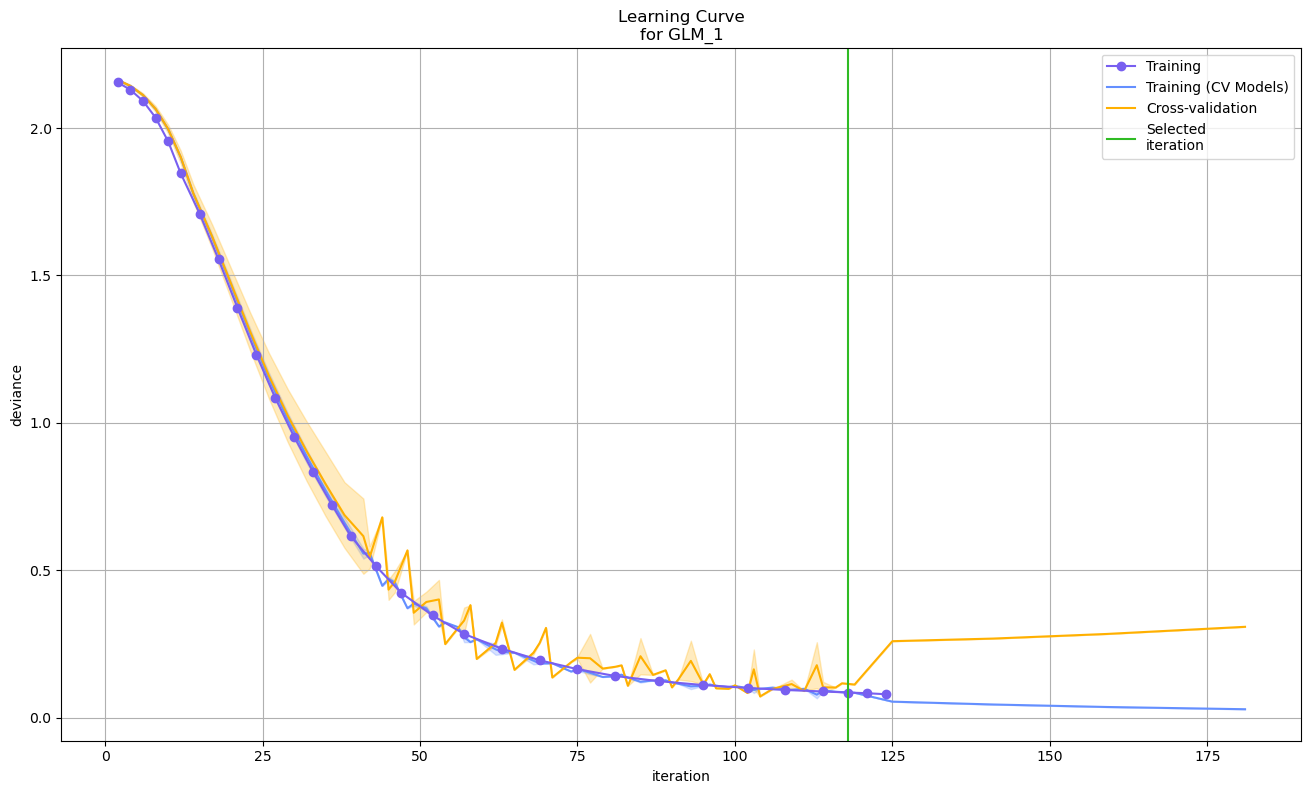

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

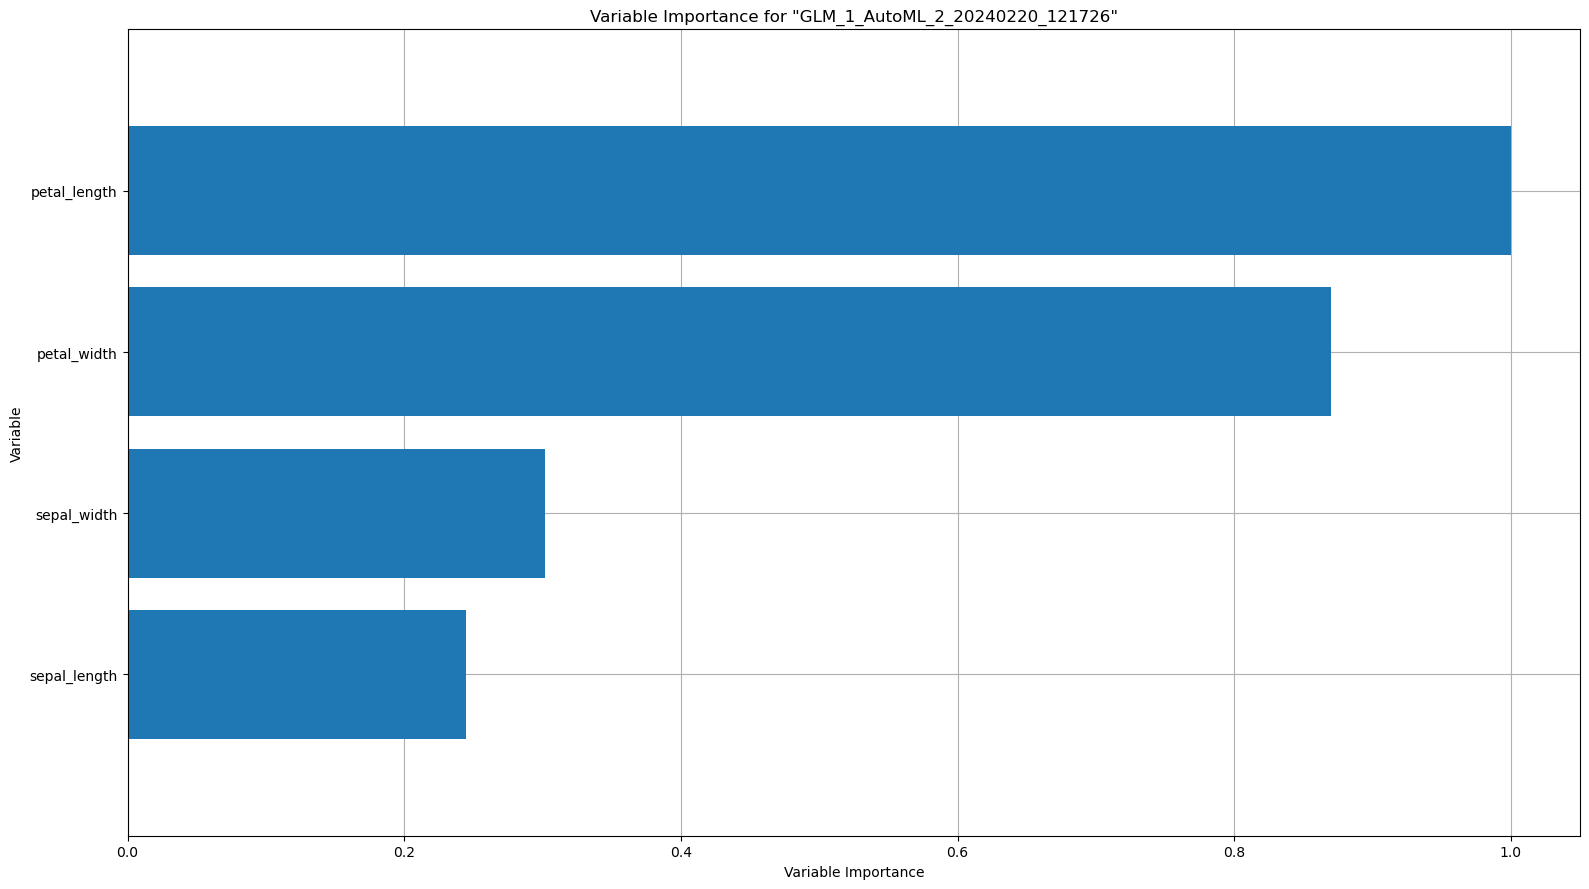

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

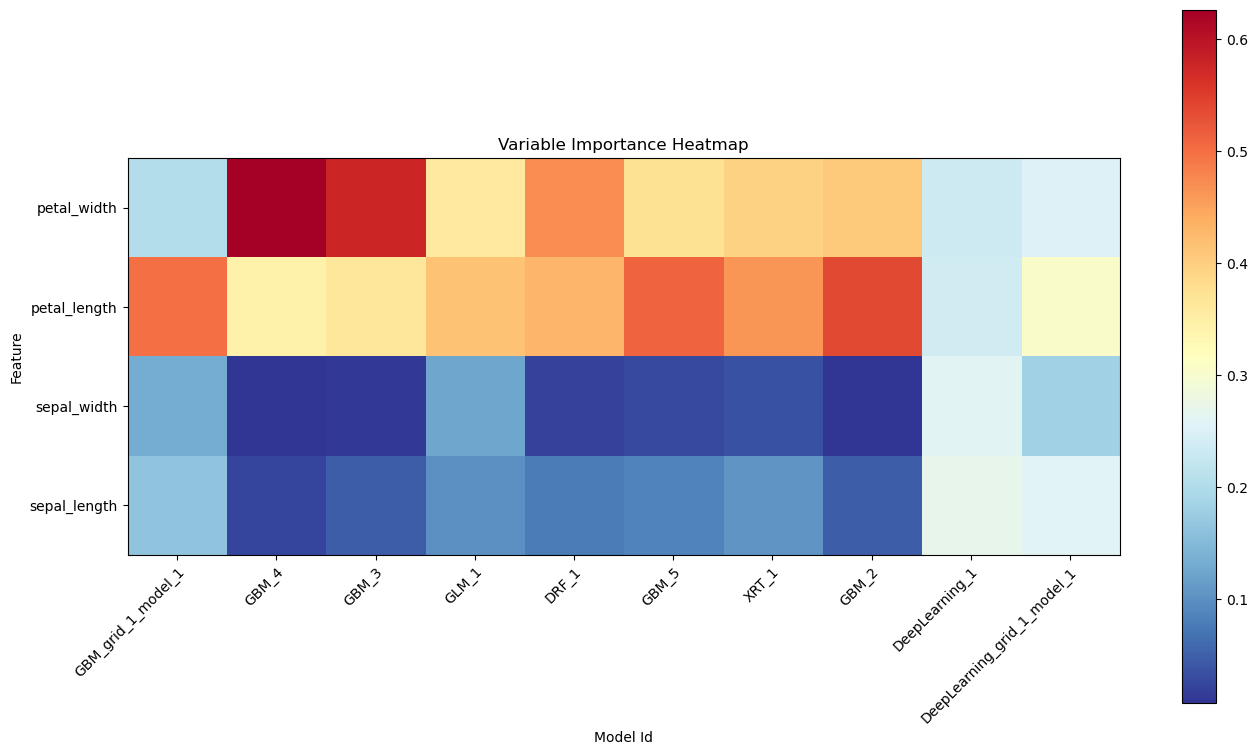

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

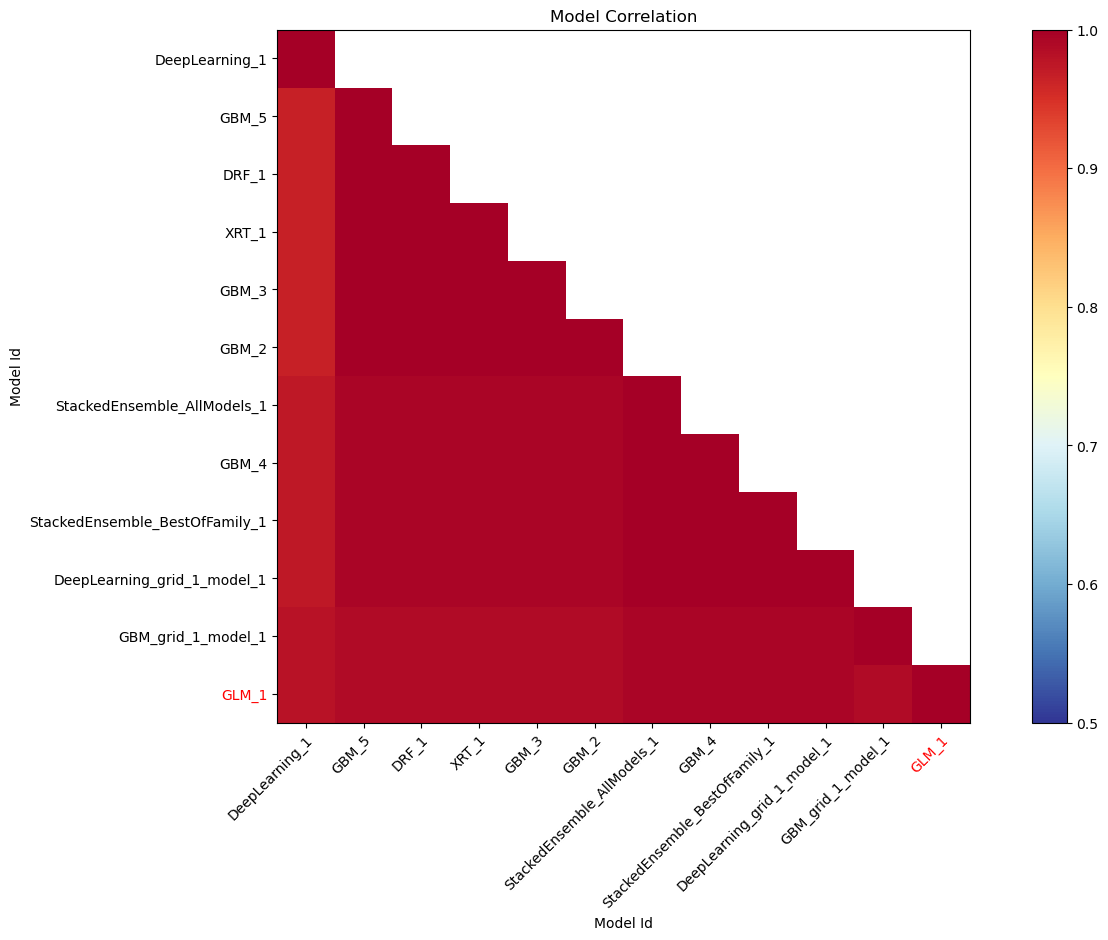

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

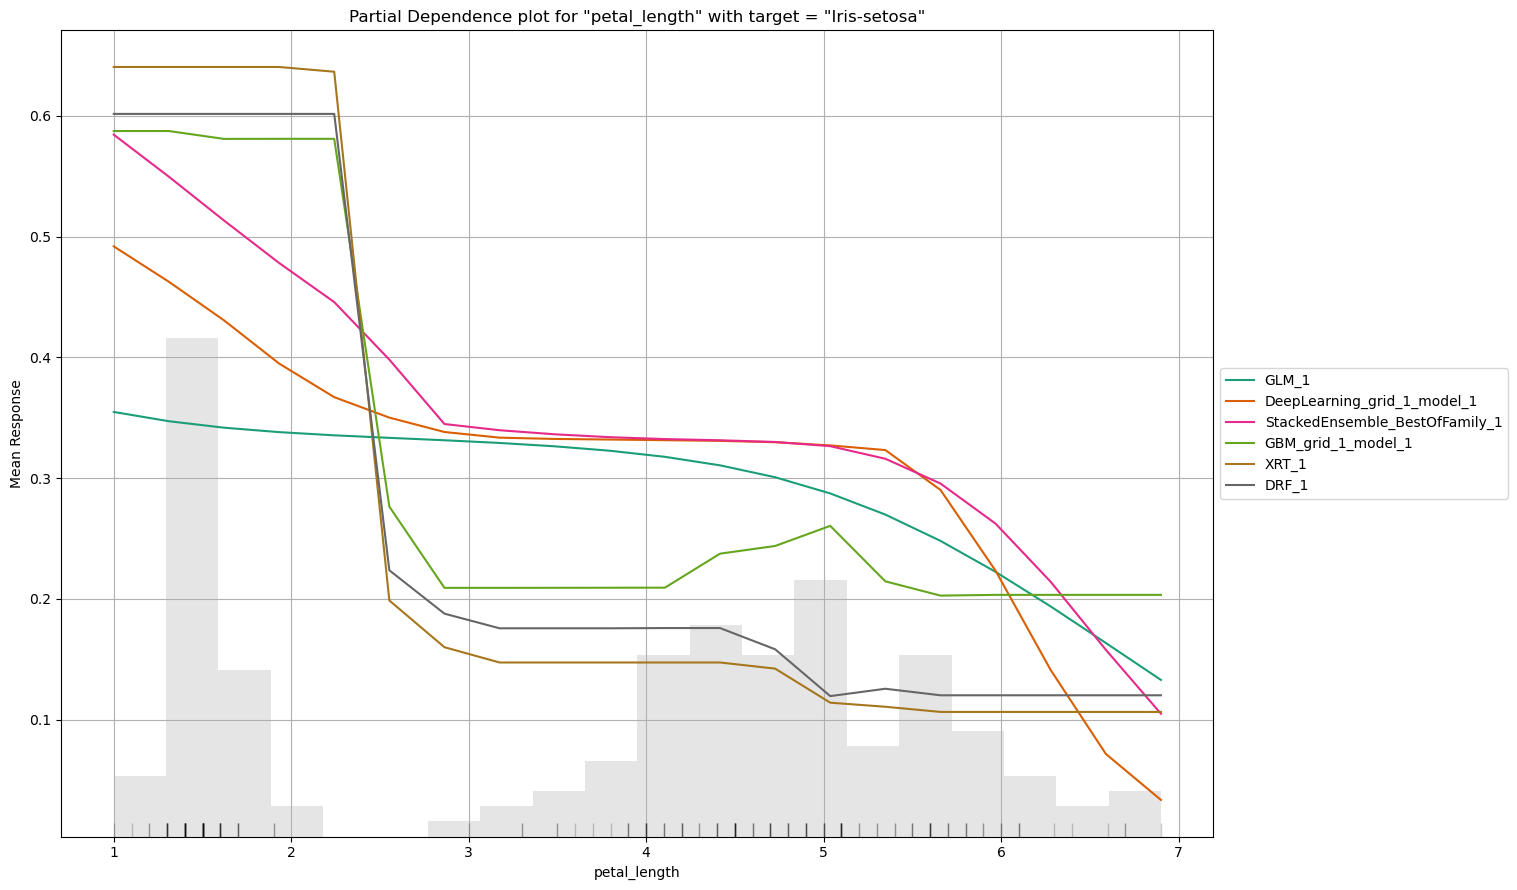

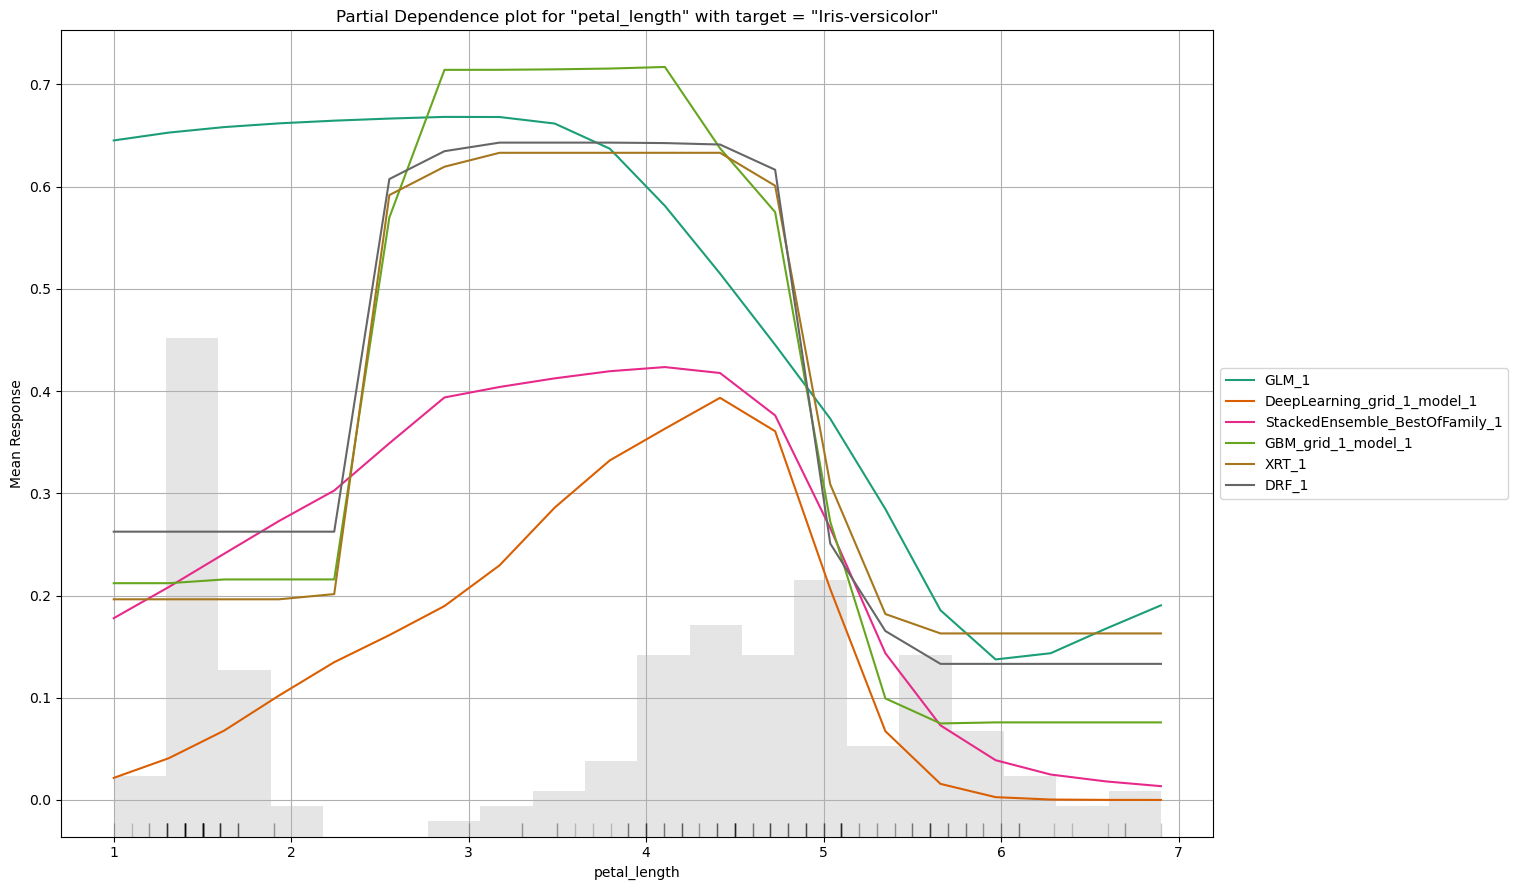

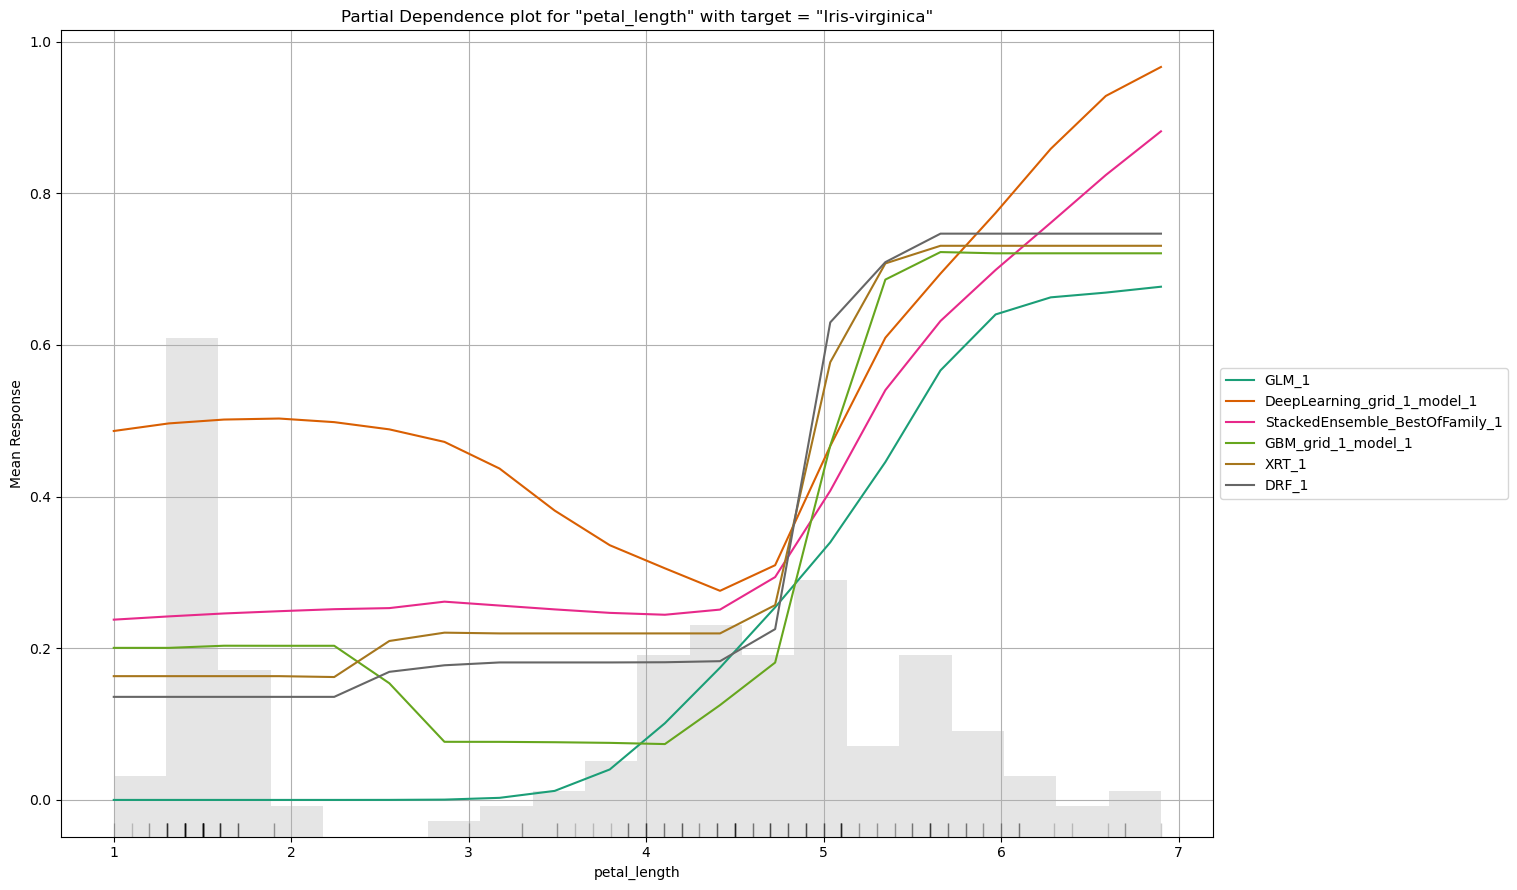

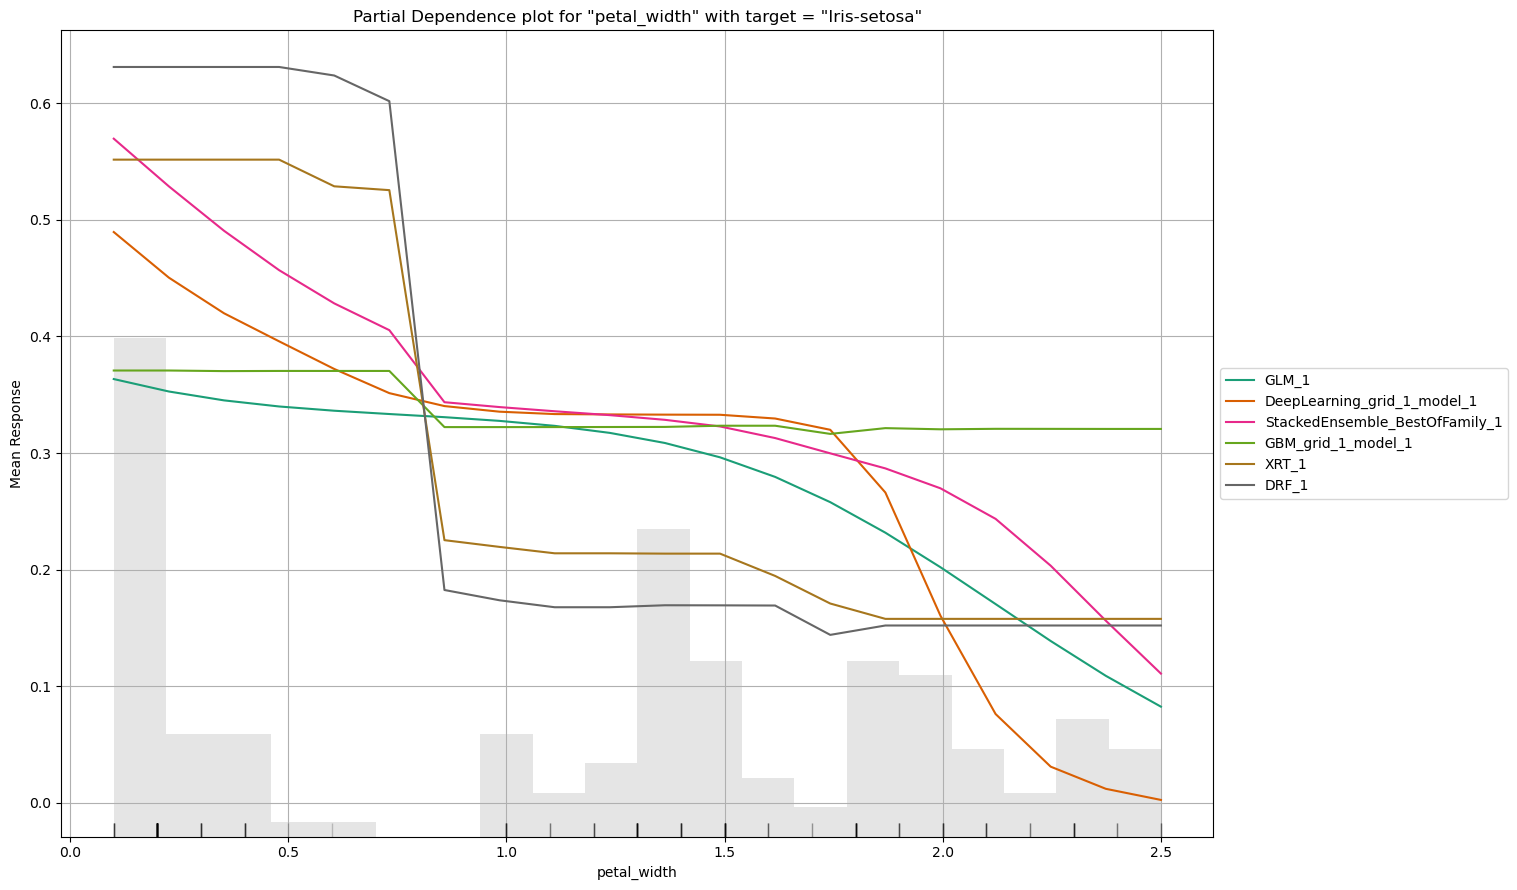

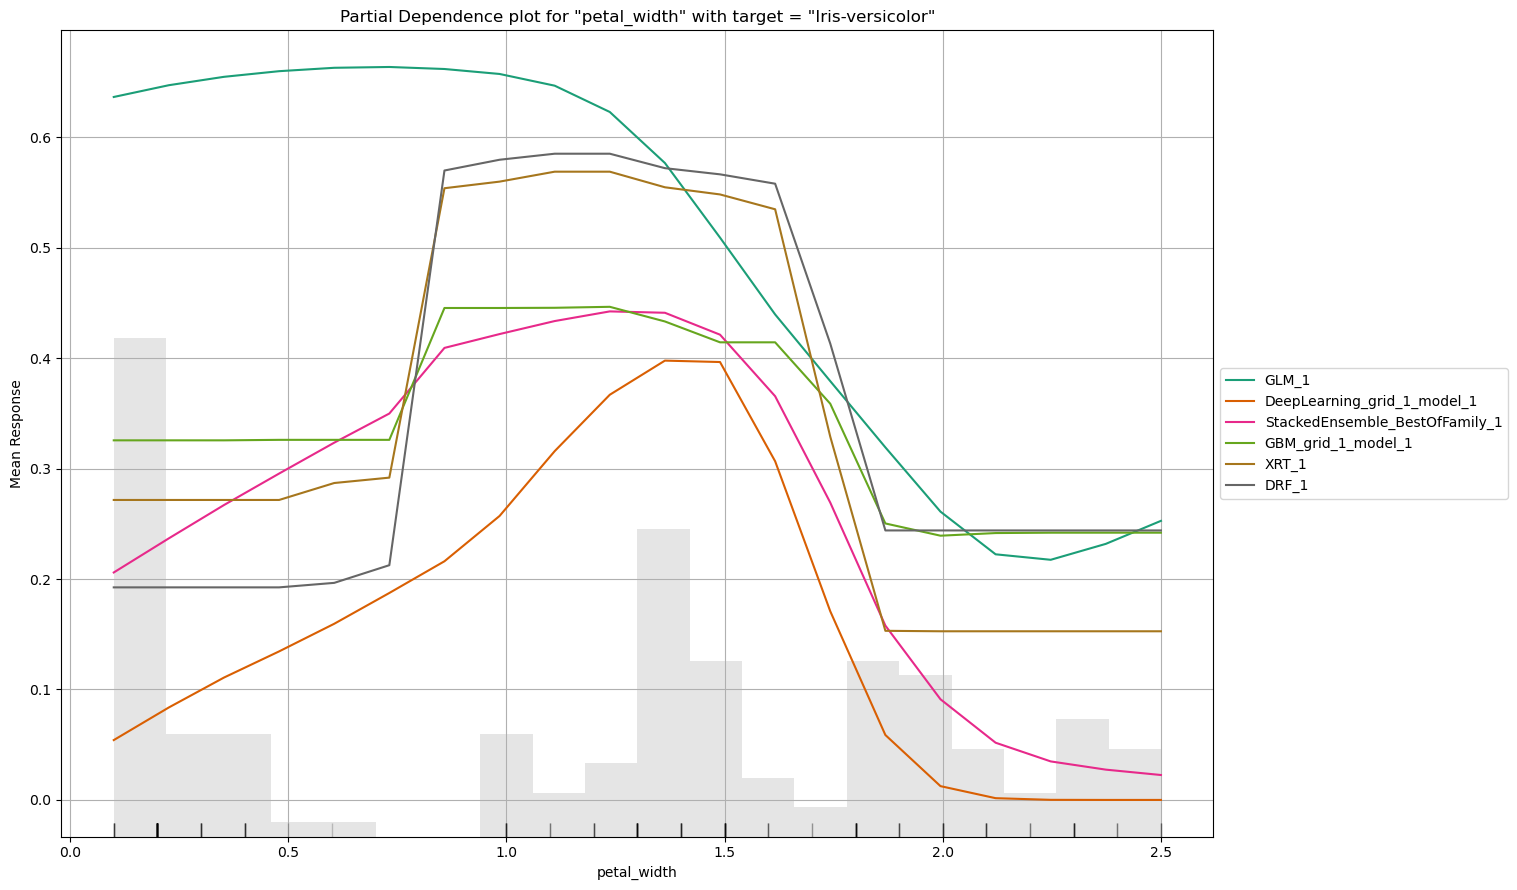

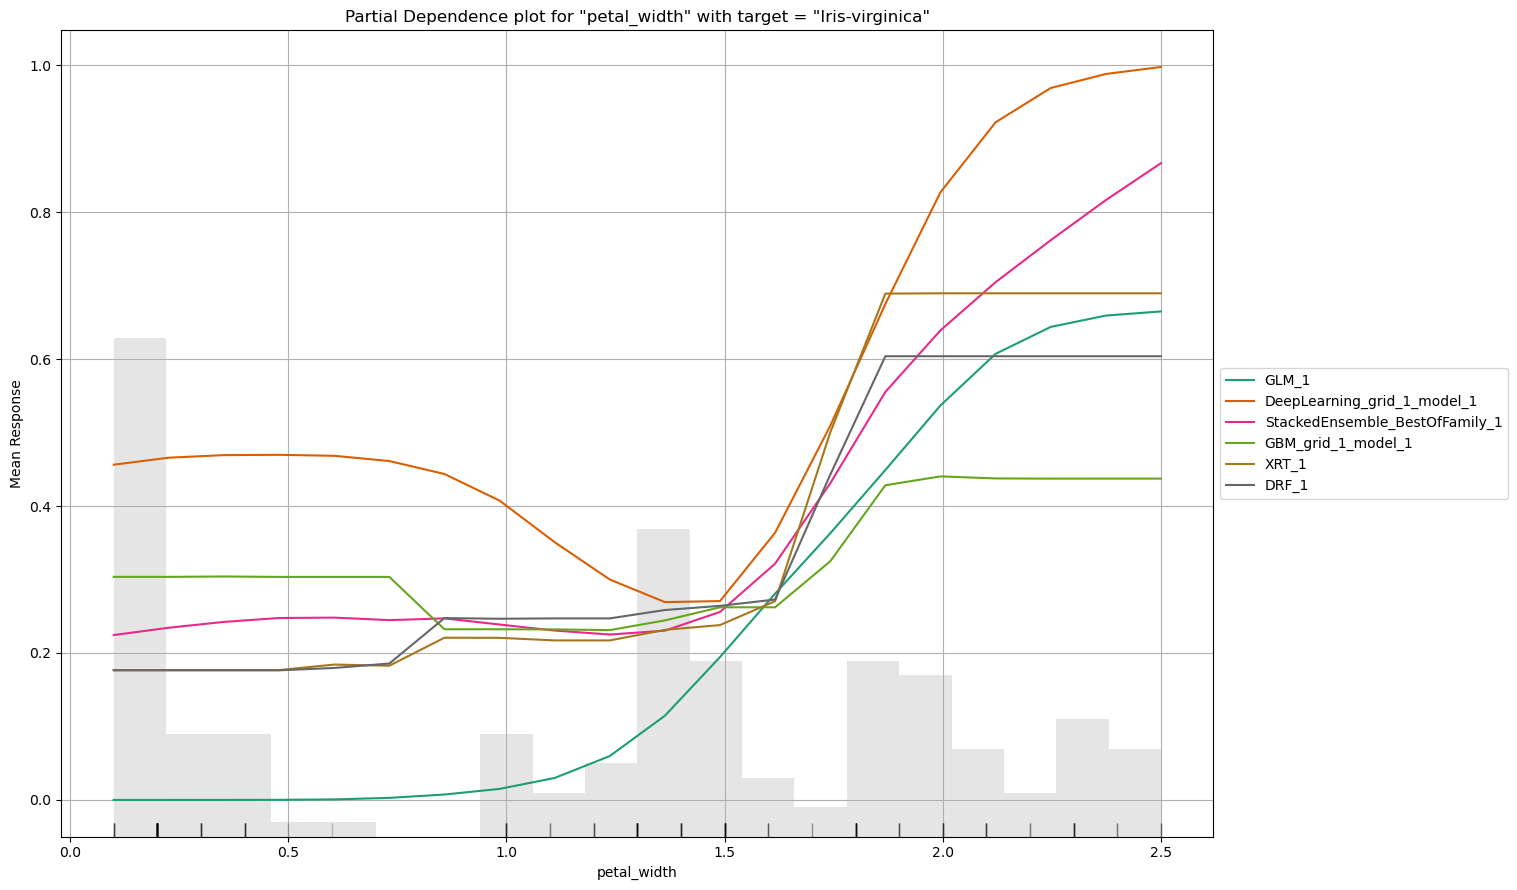

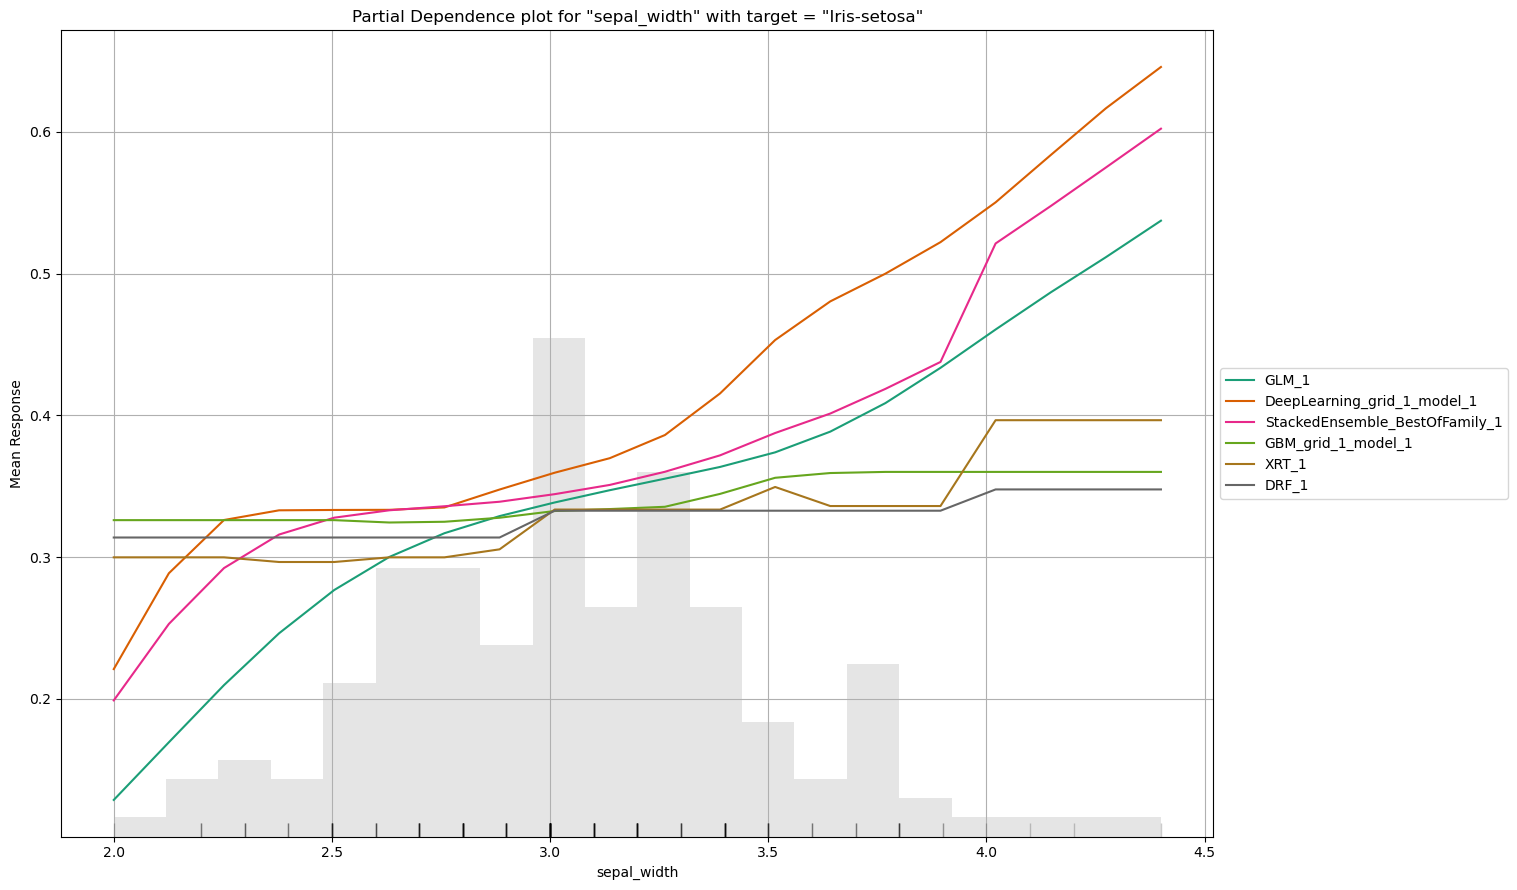

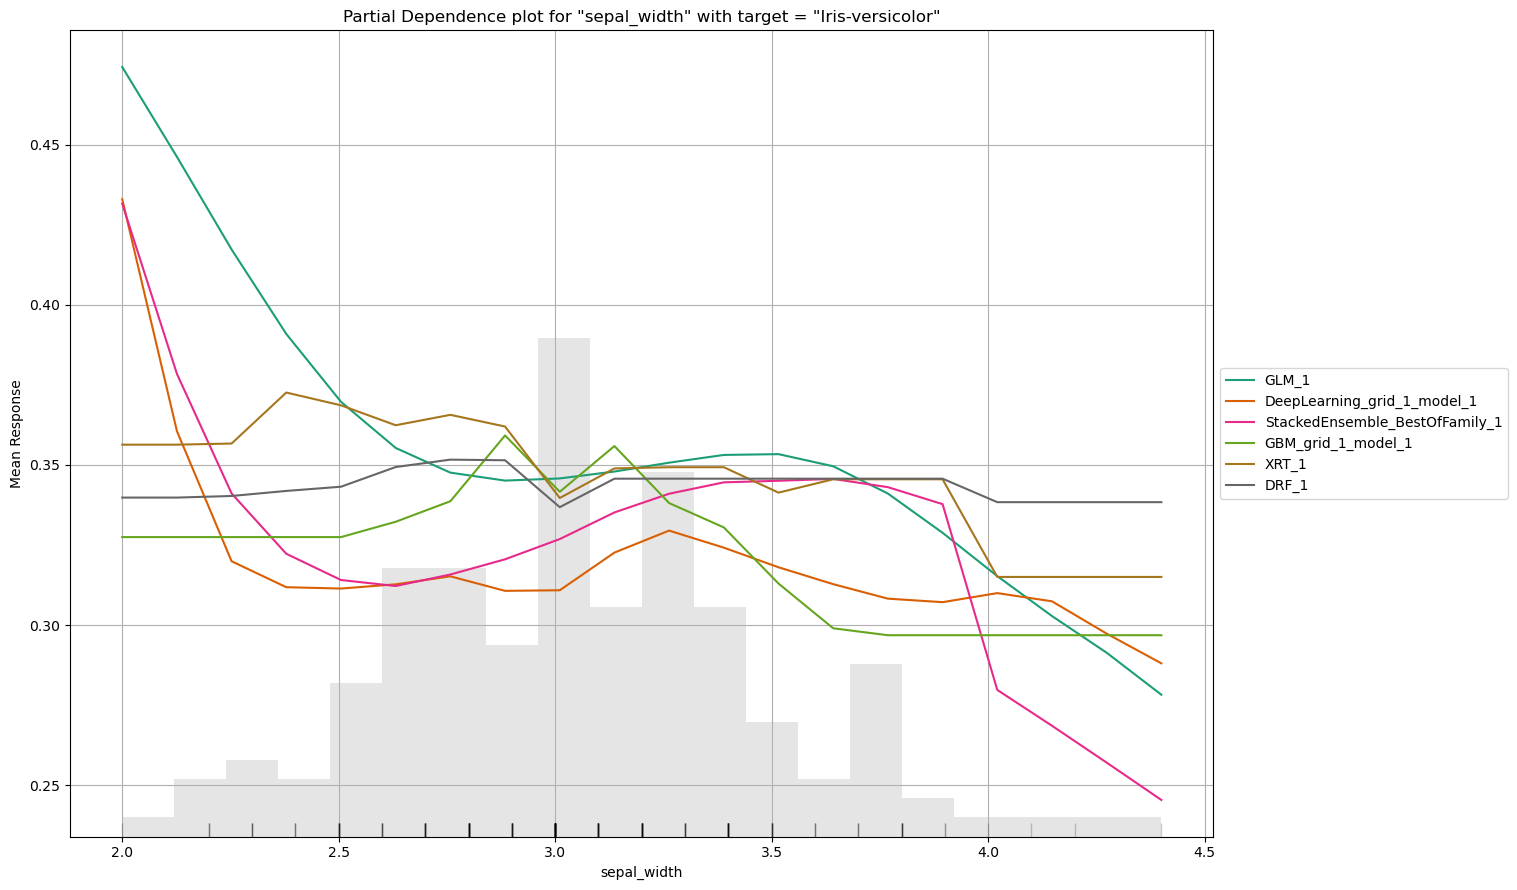

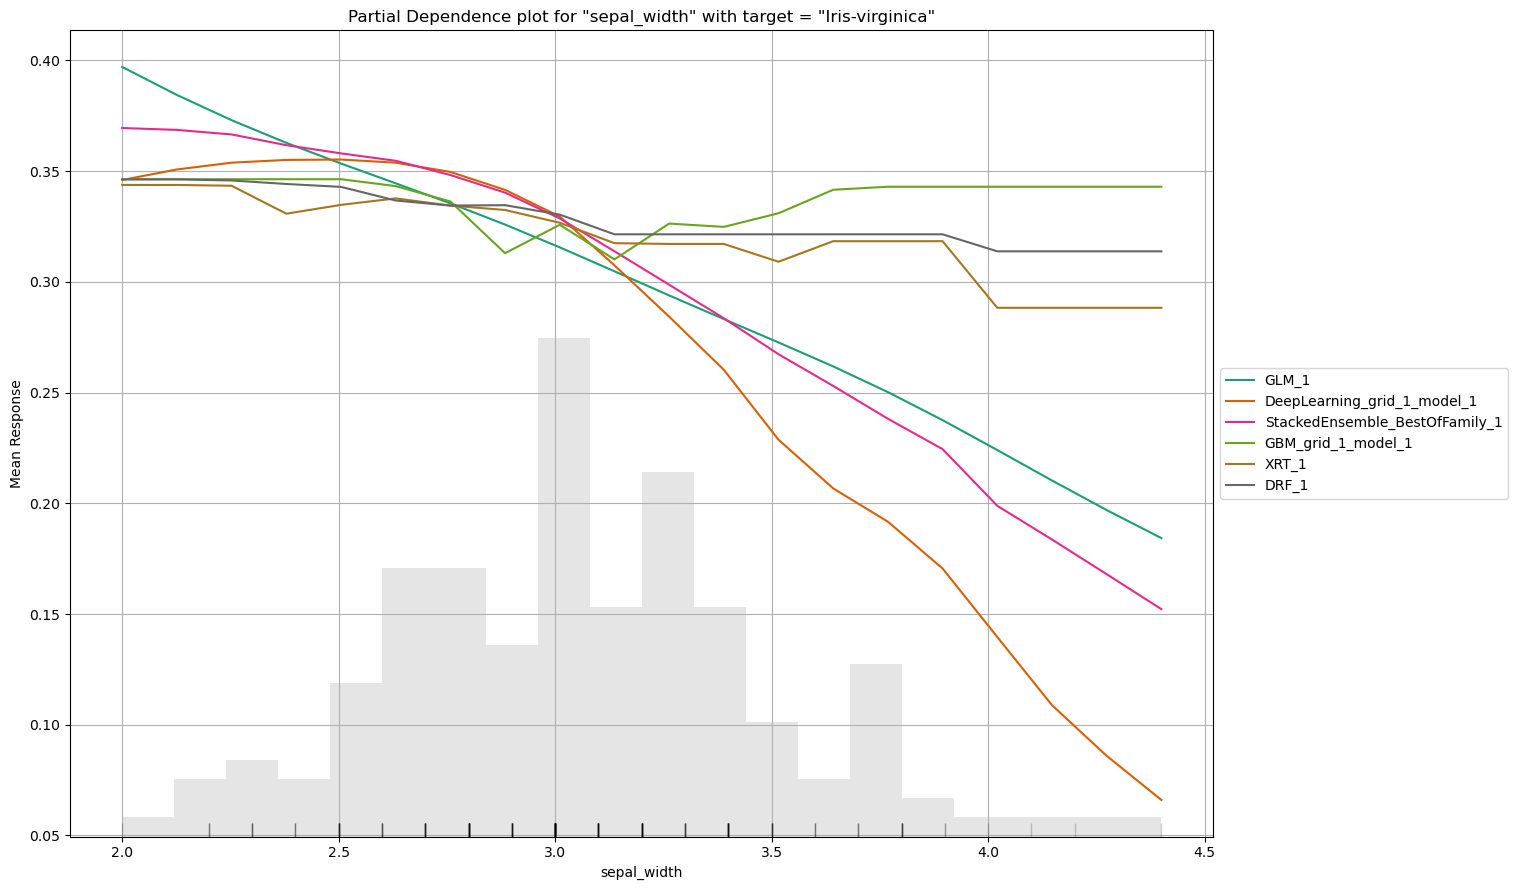

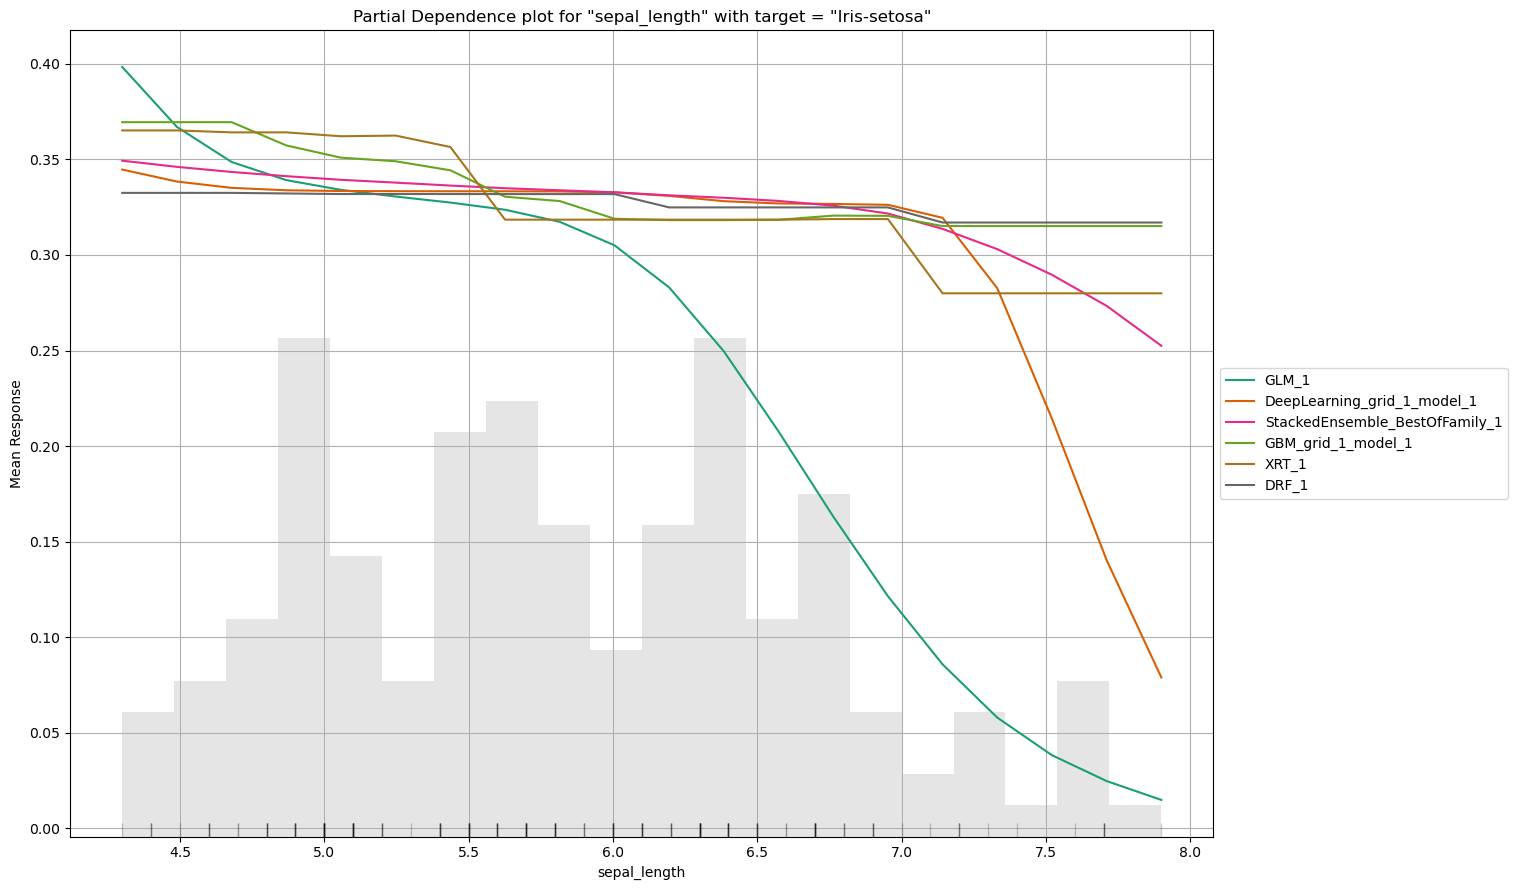

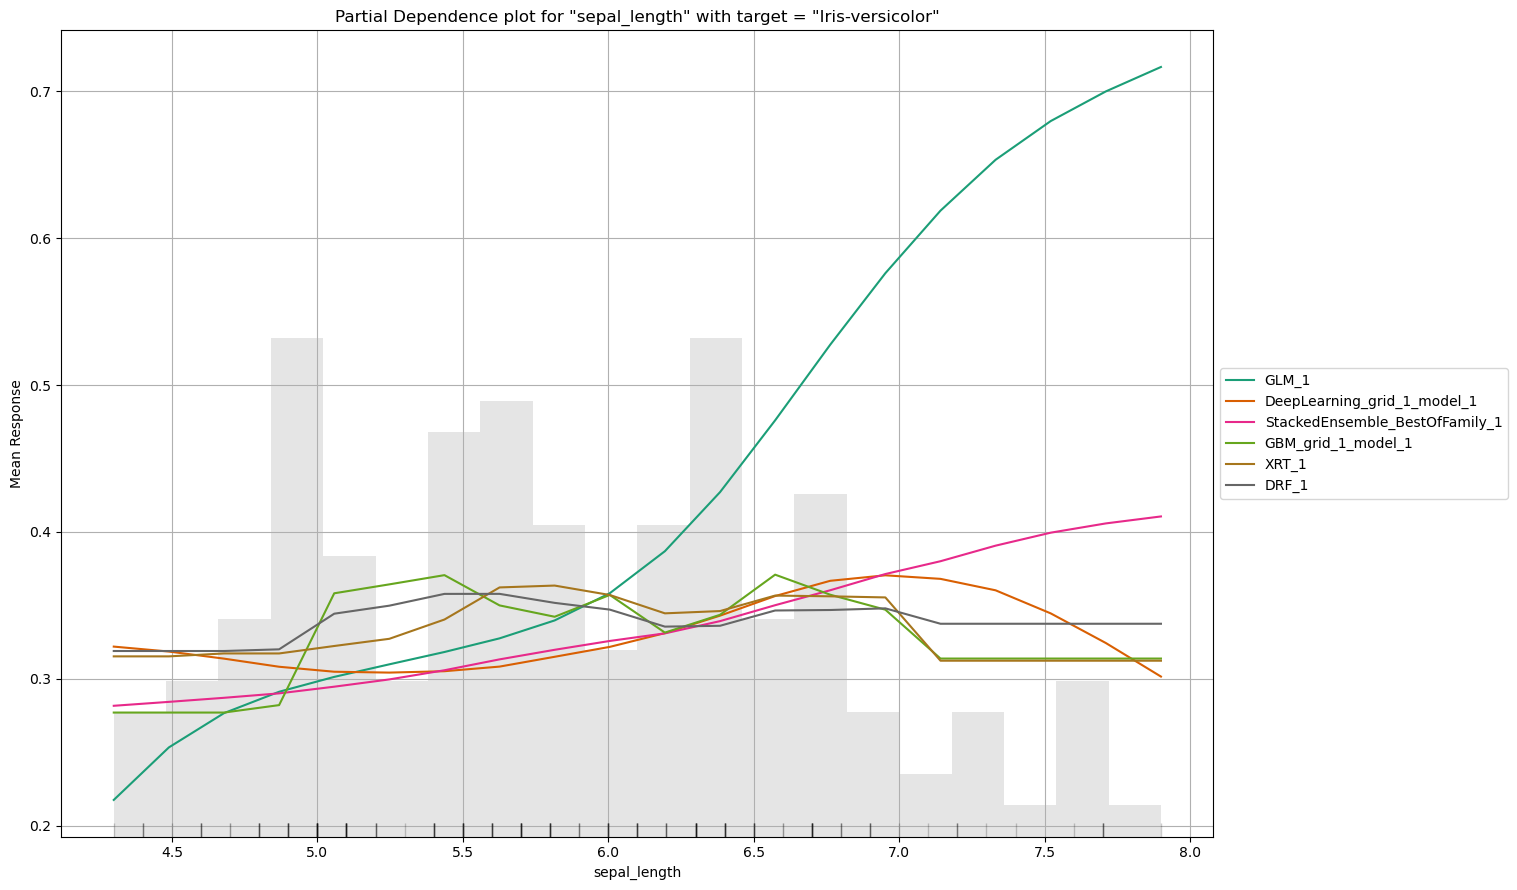

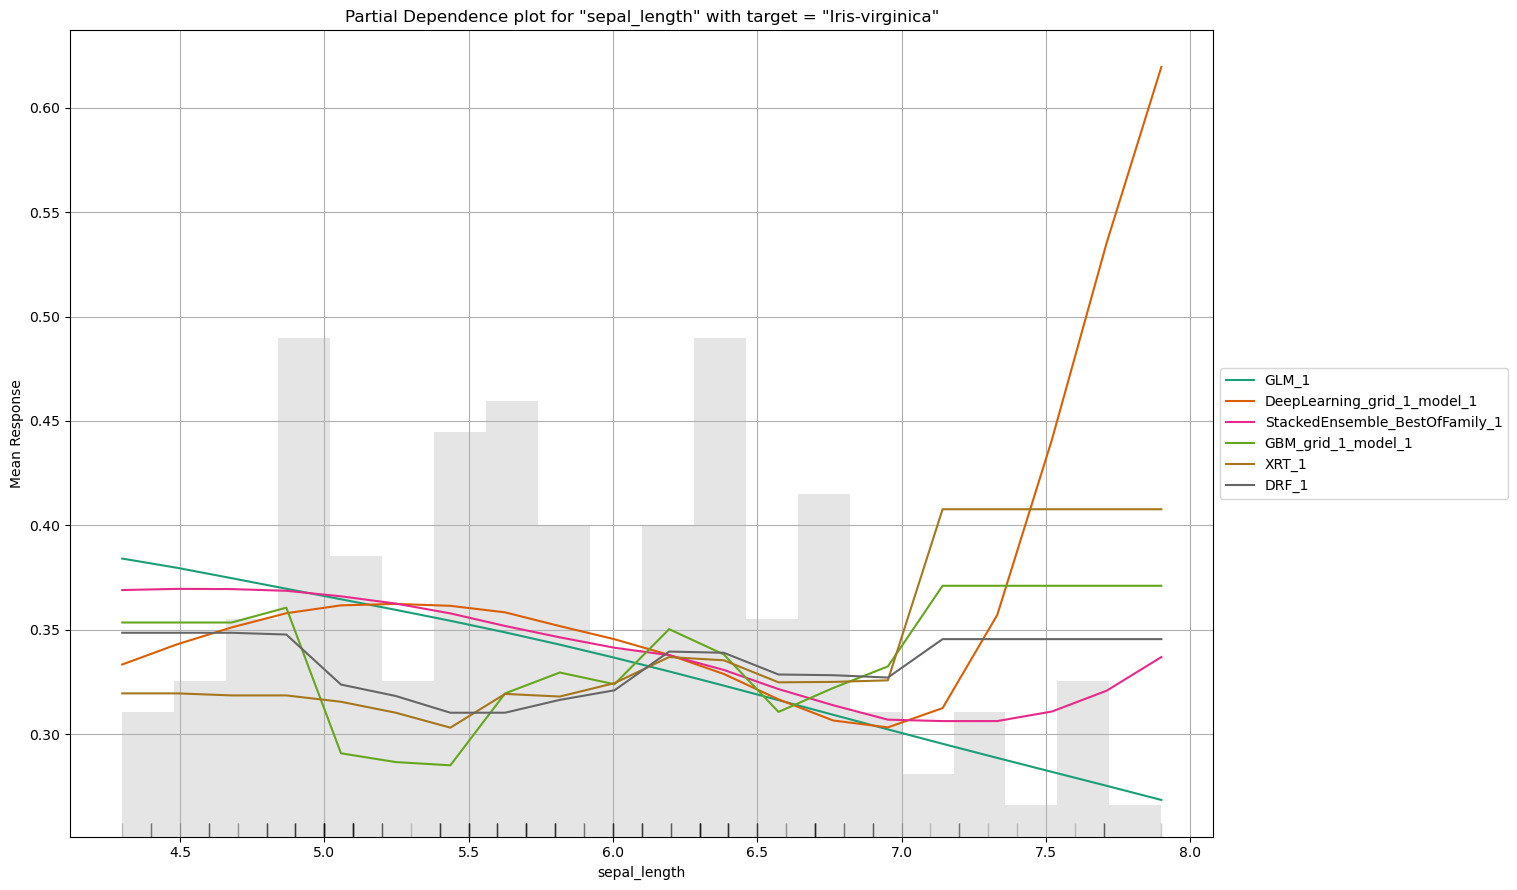

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   mean_per_class_error     logloss        rmse          mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  ----------------------  ----------  ----------  -----------  ------------------  -------------------------  ---------------
DRF_1_AutoML_2_20240220_121726                                       0           0.0277099   0.0733231   0.00537628                   31                   0.009808  DRF
GBM_2_AutoML_2_20240220_121726                                       0           0.038085    0.088445    0.00782252                   40                   0.010797  GBM
GBM_5_AutoML_2_20240220_121726                                       0           0.00742351  0.00861486  7.42159e-05                  37                   0.013418  GBM
GBM_3_AutoML_2_20240220_121726                                       0           0.0323769   0.0806854   0.00651013                   47                   0.010512  GBM
XRT_1_AutoML_2_20240220_121726                                       0           0.027701    0.0705037   0.00497078                   37                   0.010138  DRF
StackedEnsemble_BestOfFamily_1_AutoML_2_20240220_121726              0.00666667  0.0547756   0.109422    0.0119731                   852                   0.09364   StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20240220_121726                 0.00666667  0.0566805   0.11039     0.0121859                   951                   0.059411  StackedEnsemble
DeepLearning_grid_1_AutoML_2_20240220_121726_model_1                 0.00666667  0.0297213   0.0886949   0.00786679                 2972                   0.002286  DeepLearning
GBM_4_AutoML_2_20240220_121726                                       0.00666667  0.0325098   0.0816298   0.00666343                   42                   0.011522  GBM
GBM_grid_1_AutoML_2_20240220_121726_model_1                          0.0133333   0.0541489   0.113549    0.0128933                    52                   0.018353  GBM
GLM_1_AutoML_2_20240220_121726                                       0.0133333   0.0425856   0.113109    0.0127936                   159                   0.001325  GLM
DeepLearning_1_AutoML_2_20240220_121726                              0.0333333   0.145623    0.191491    0.0366688                     8                   0.004799  DeepLearning
[12 rows x 8 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_1_AutoML_2_20240220_121726

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Iris-setosa    Iris-versicolor    Iris-virginica    Error      Rate
-------------  -----------------  ----------------  ---------  -------
50             0                  0                 0          0 / 50
0              49                 1                 0.02       1 / 50
0              1                  49                0.02       1 / 50
50             50                 50                0.0133333  2 / 150

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

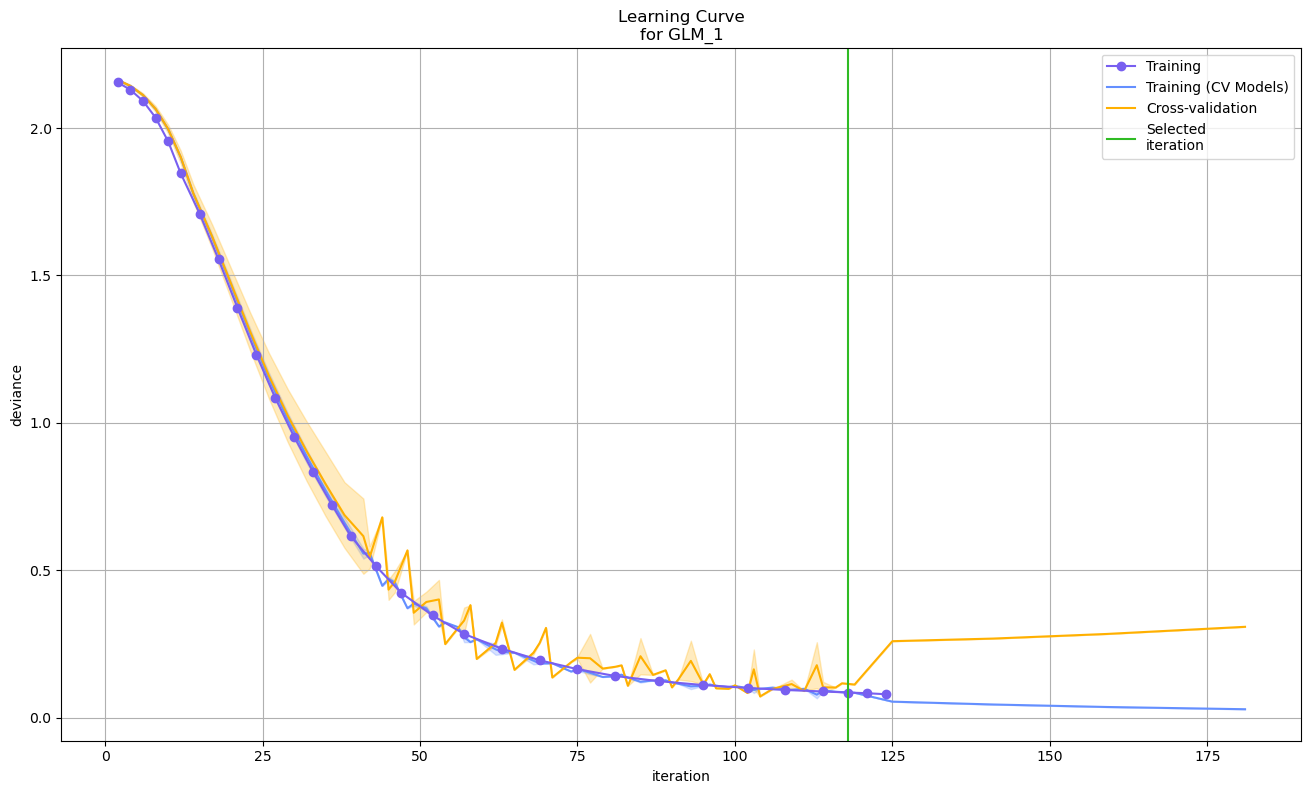

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

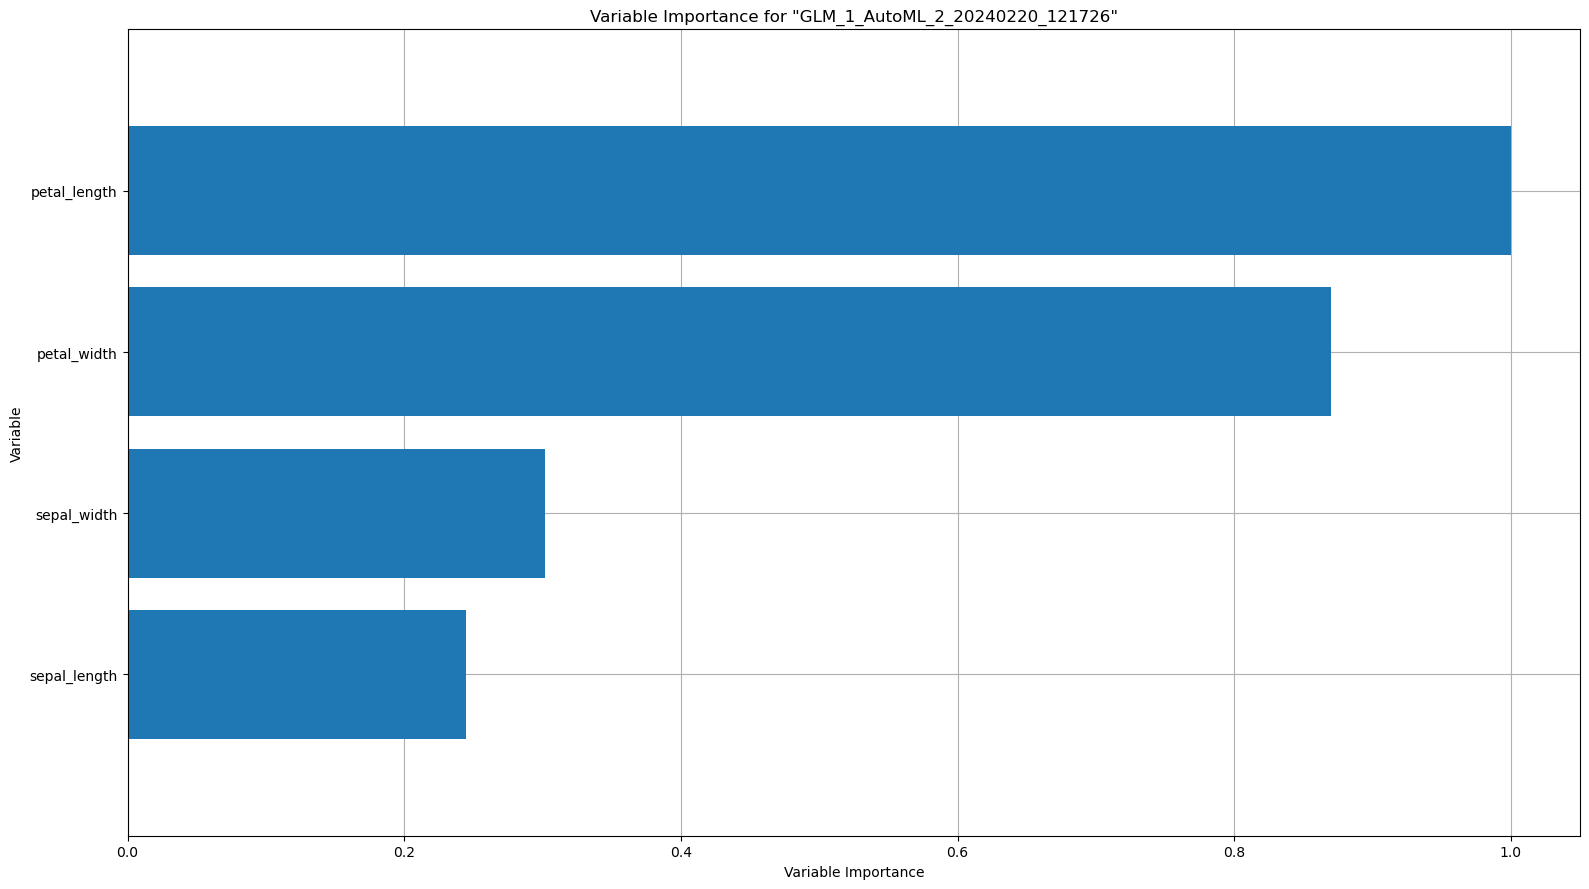

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

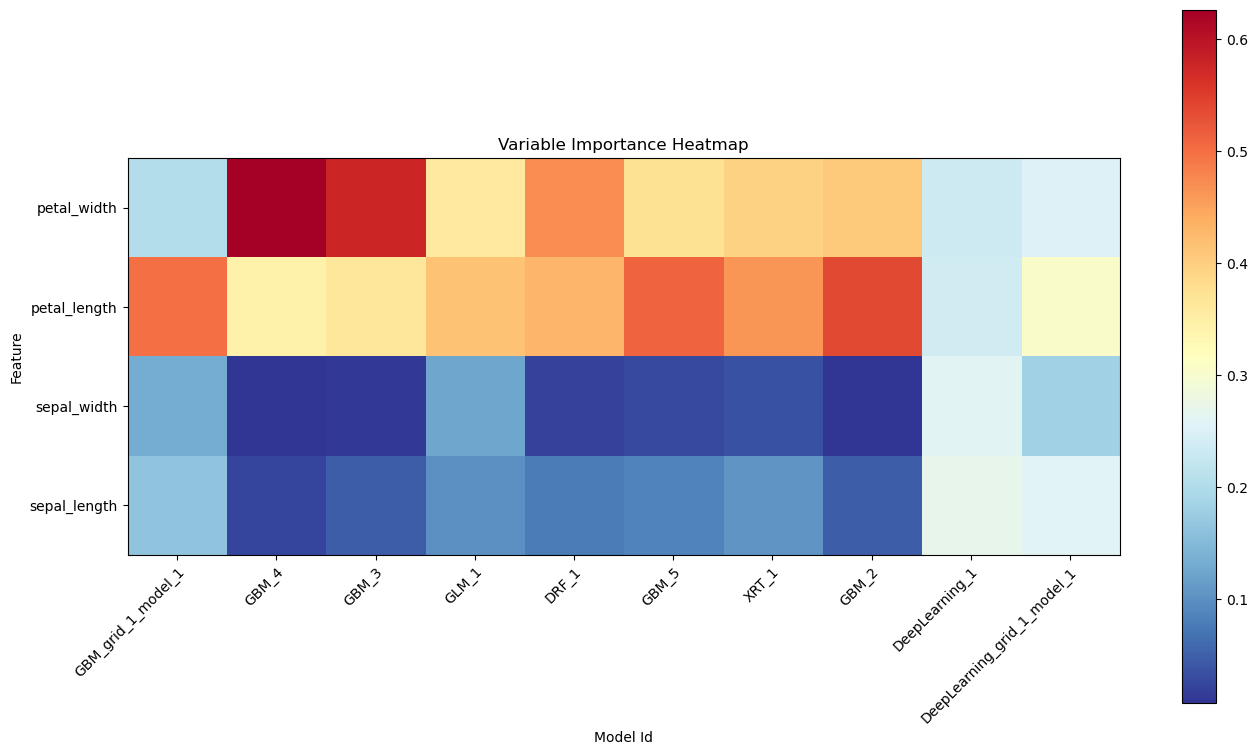

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

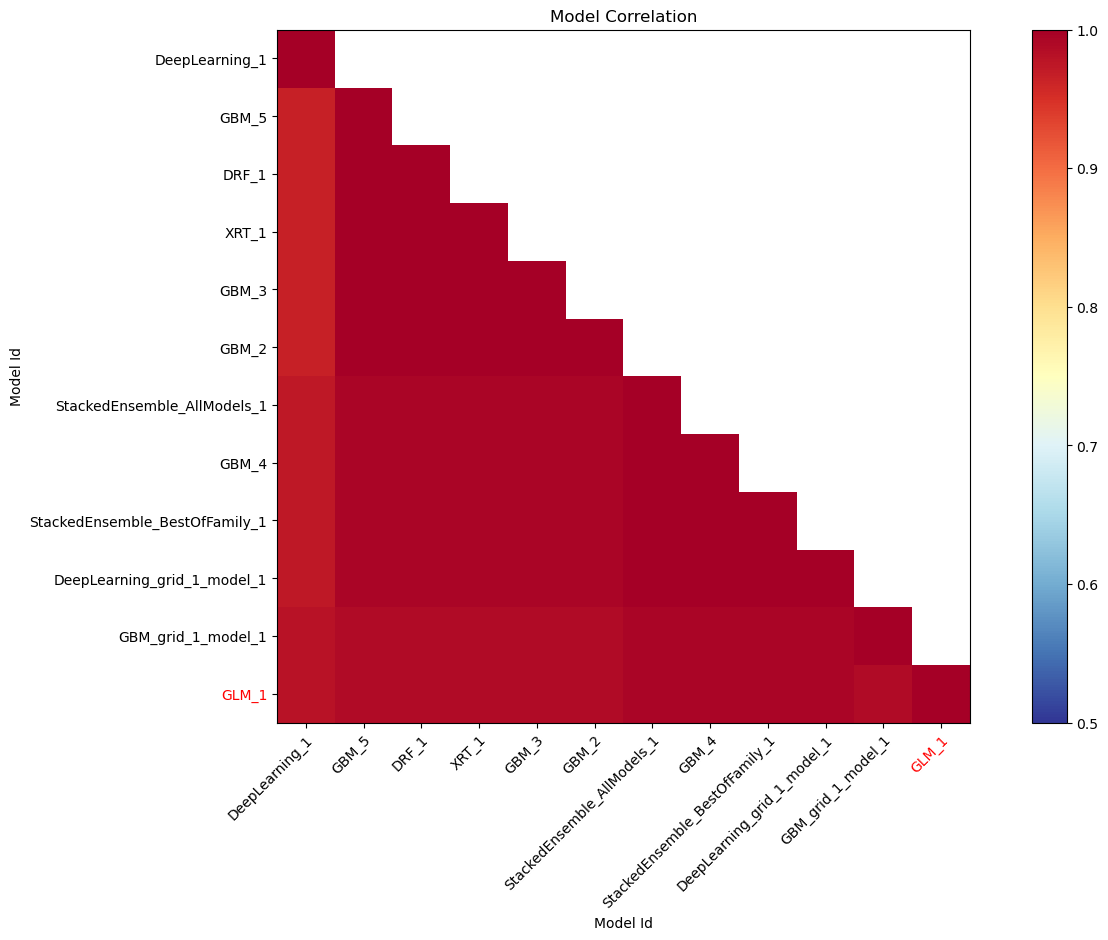

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

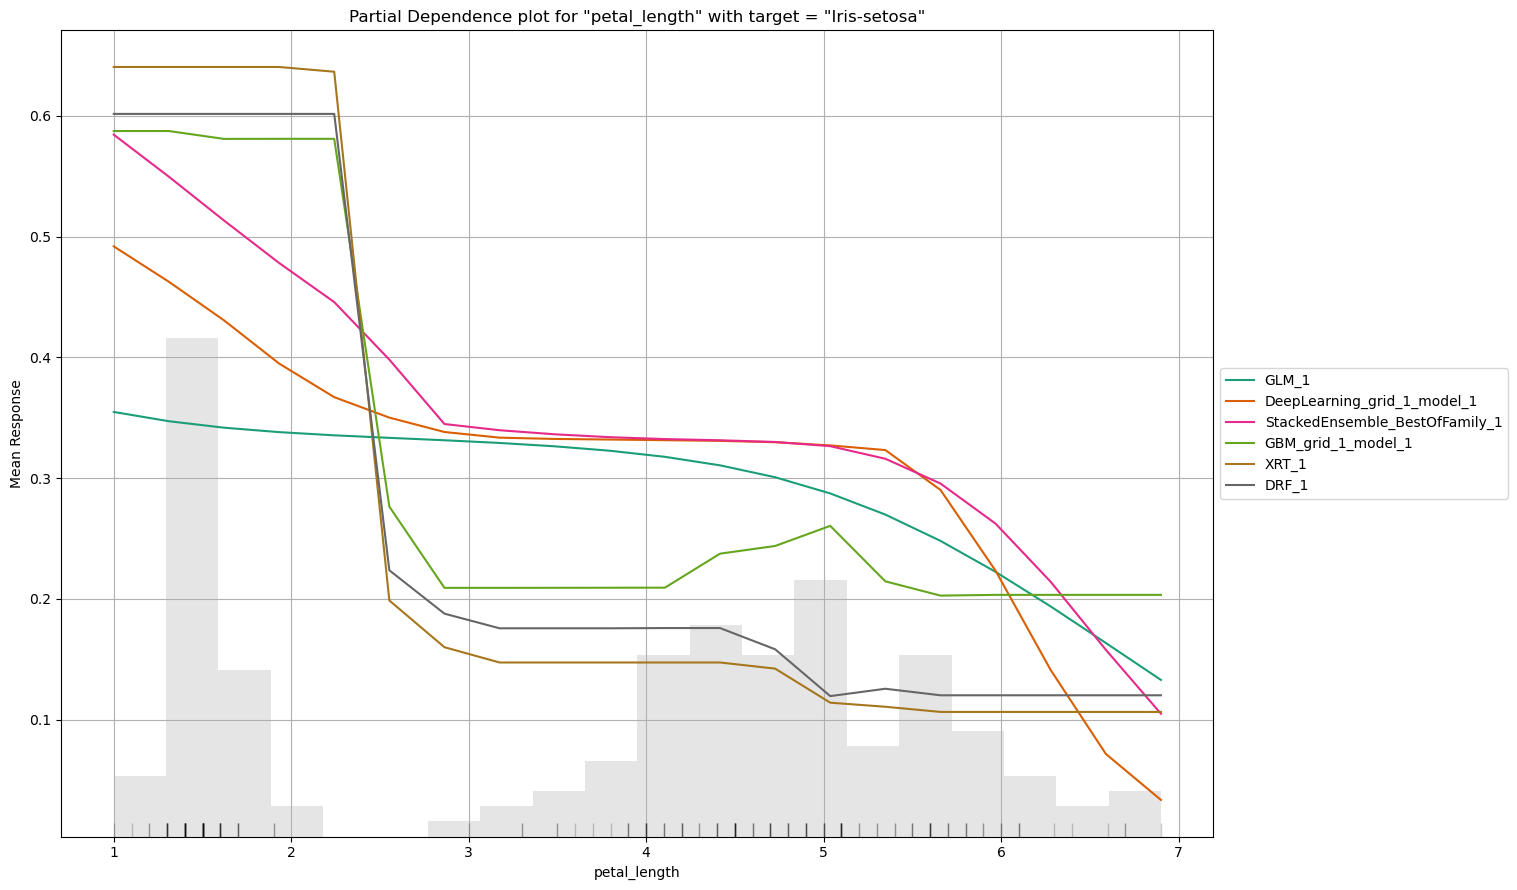

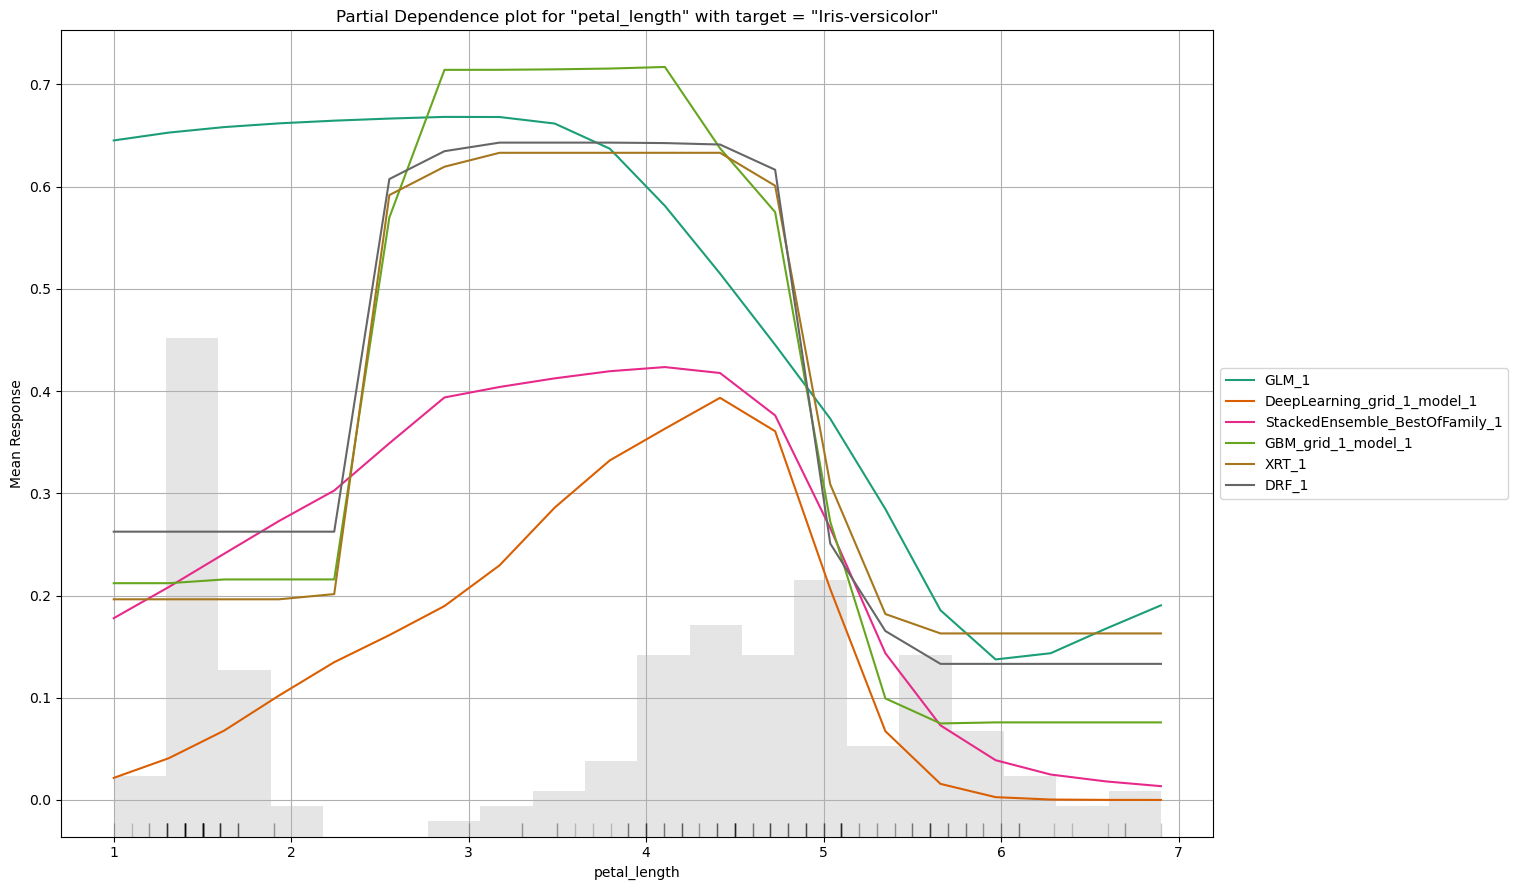

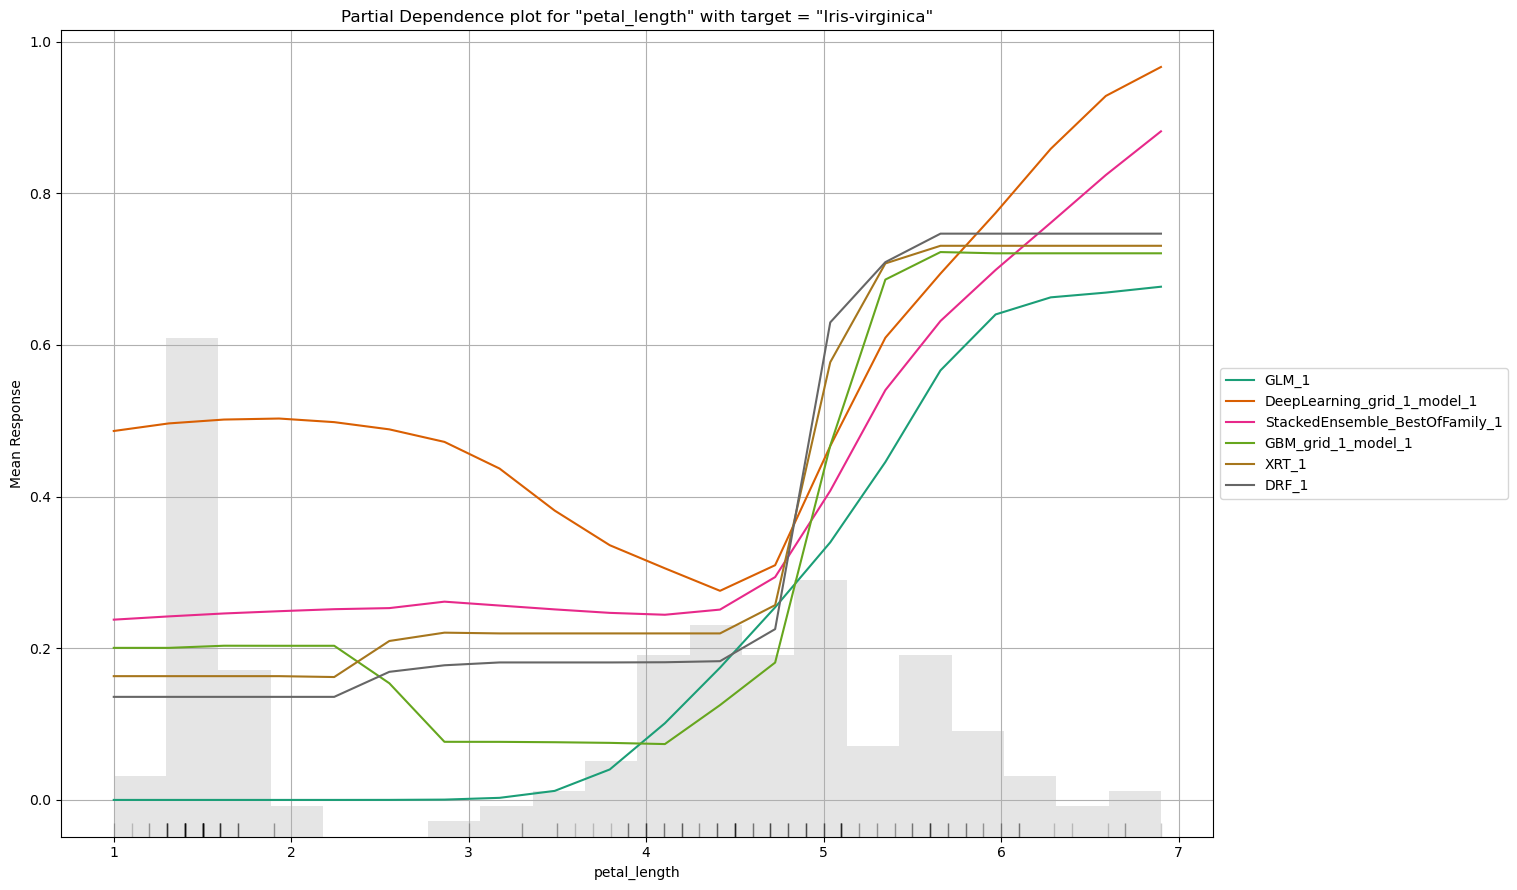

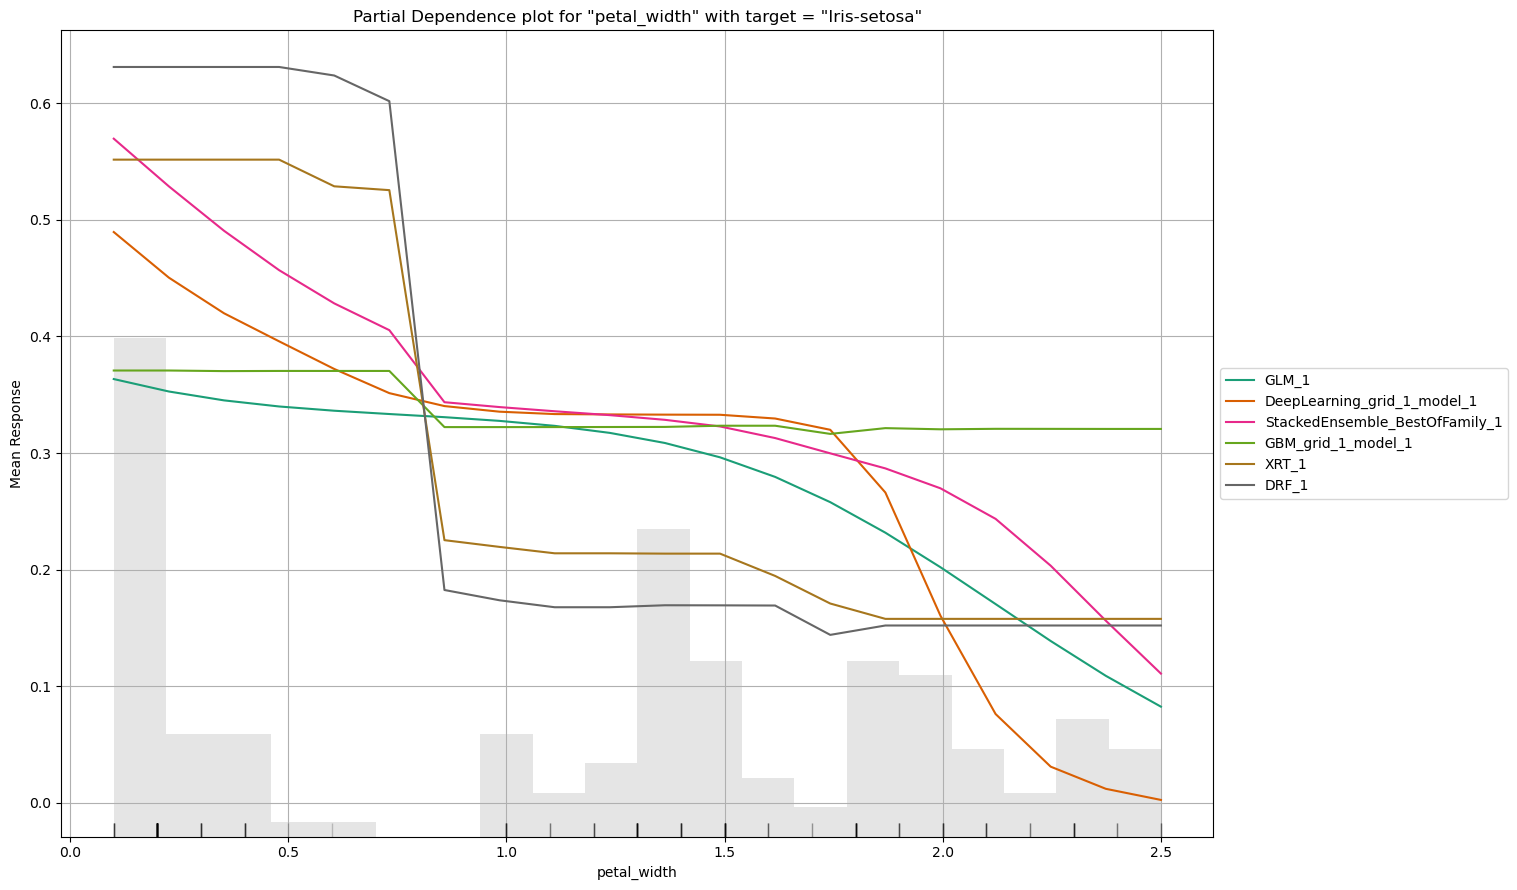

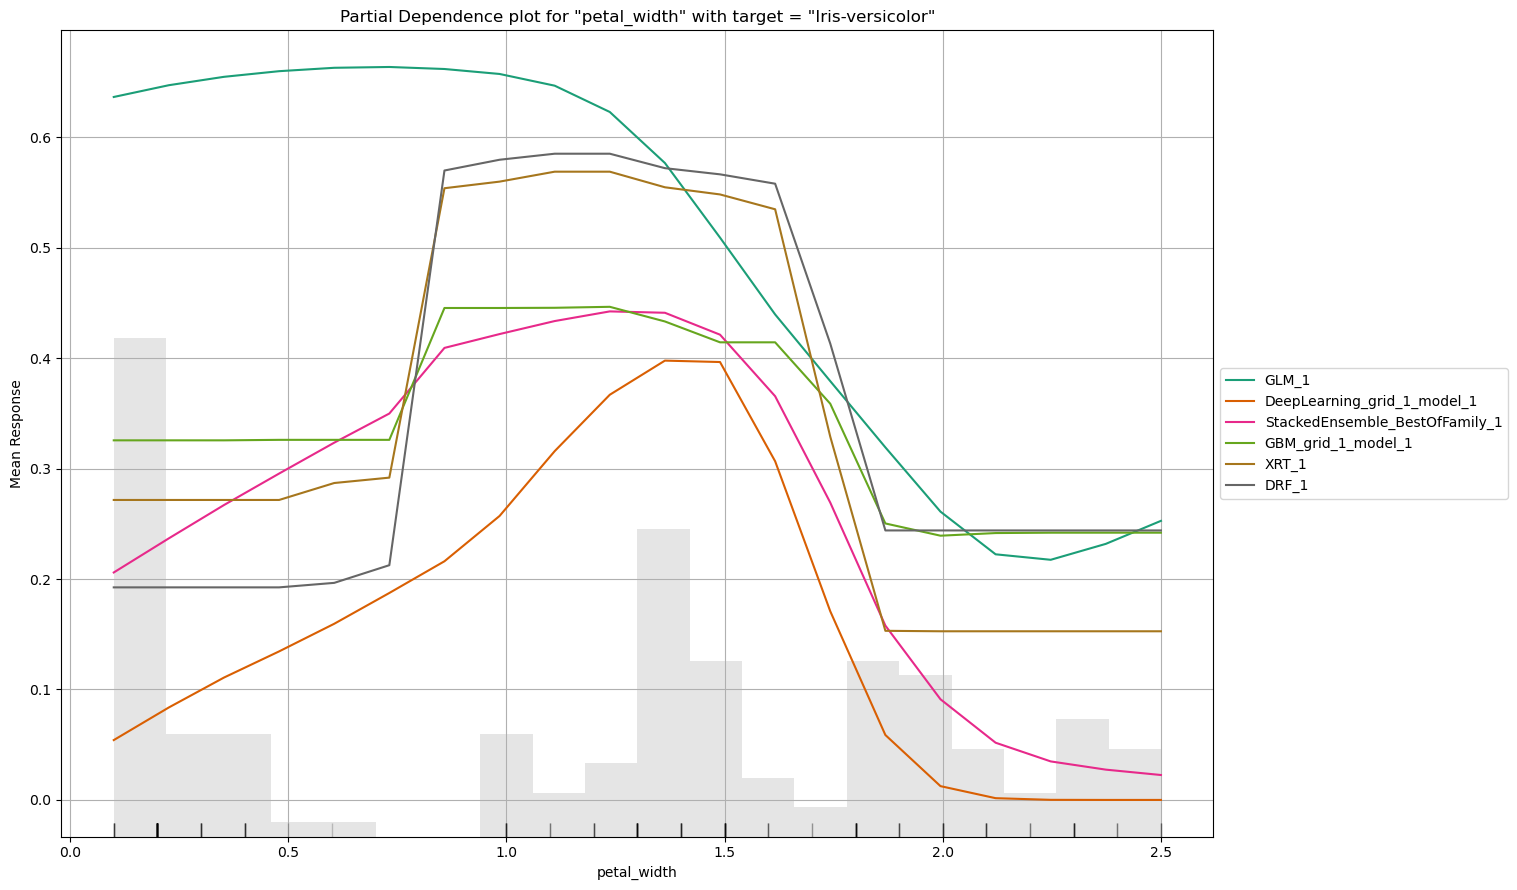

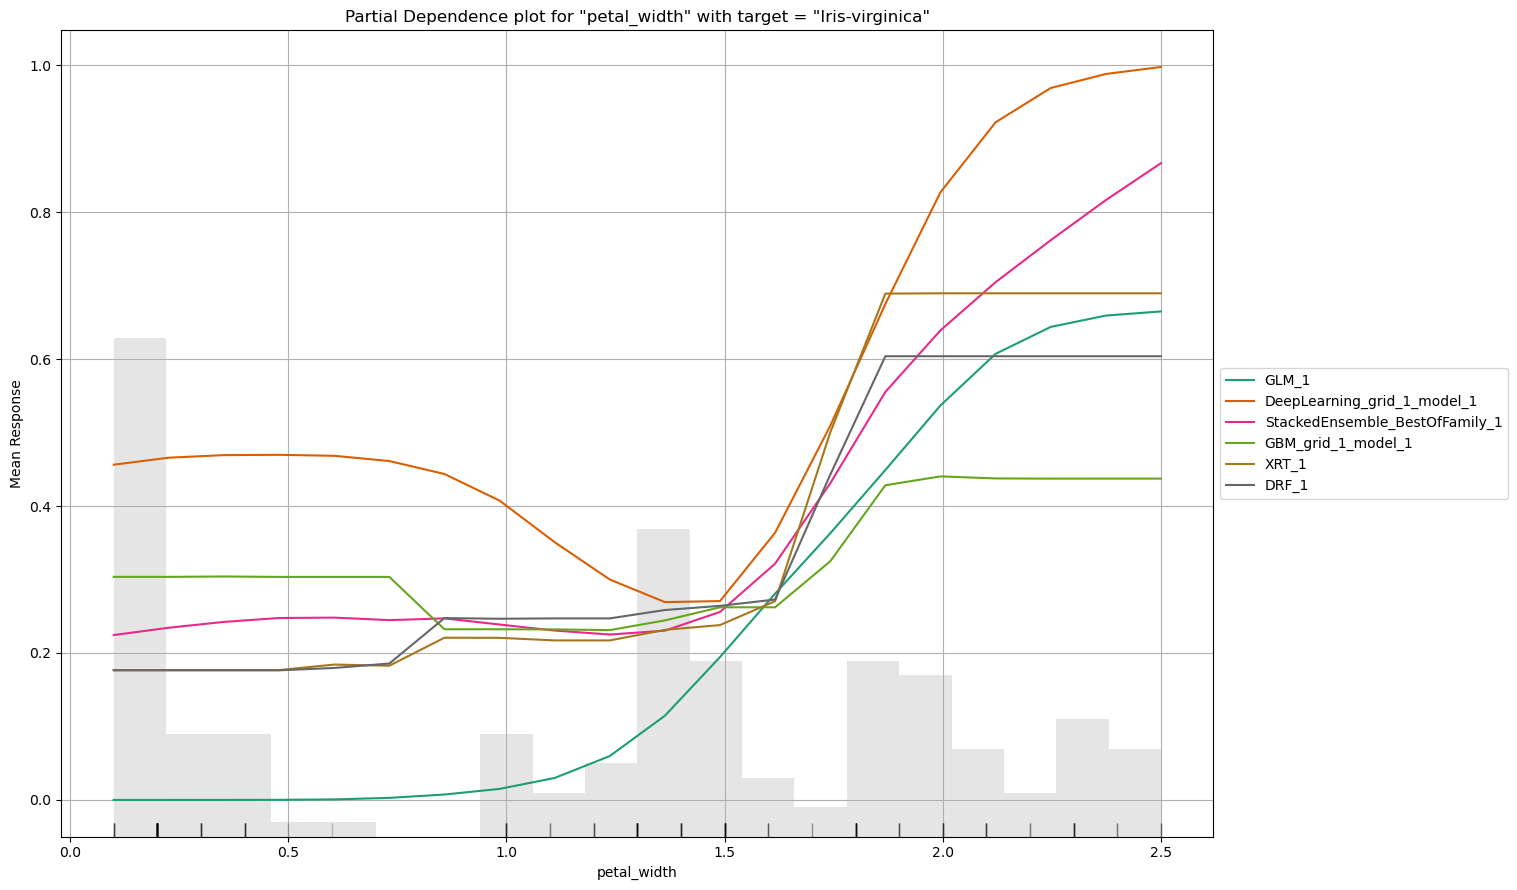

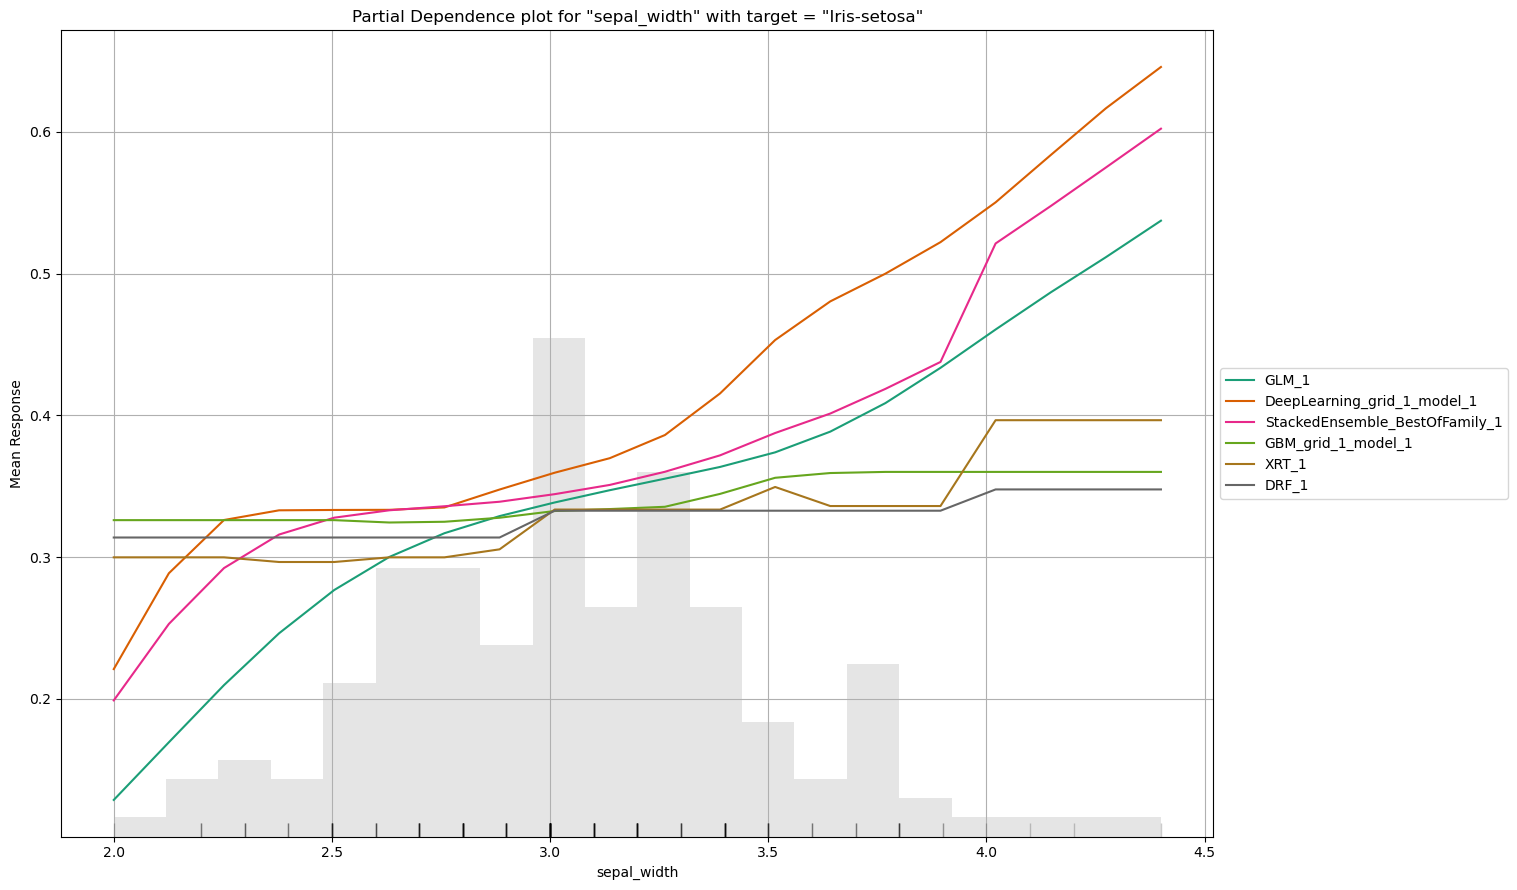

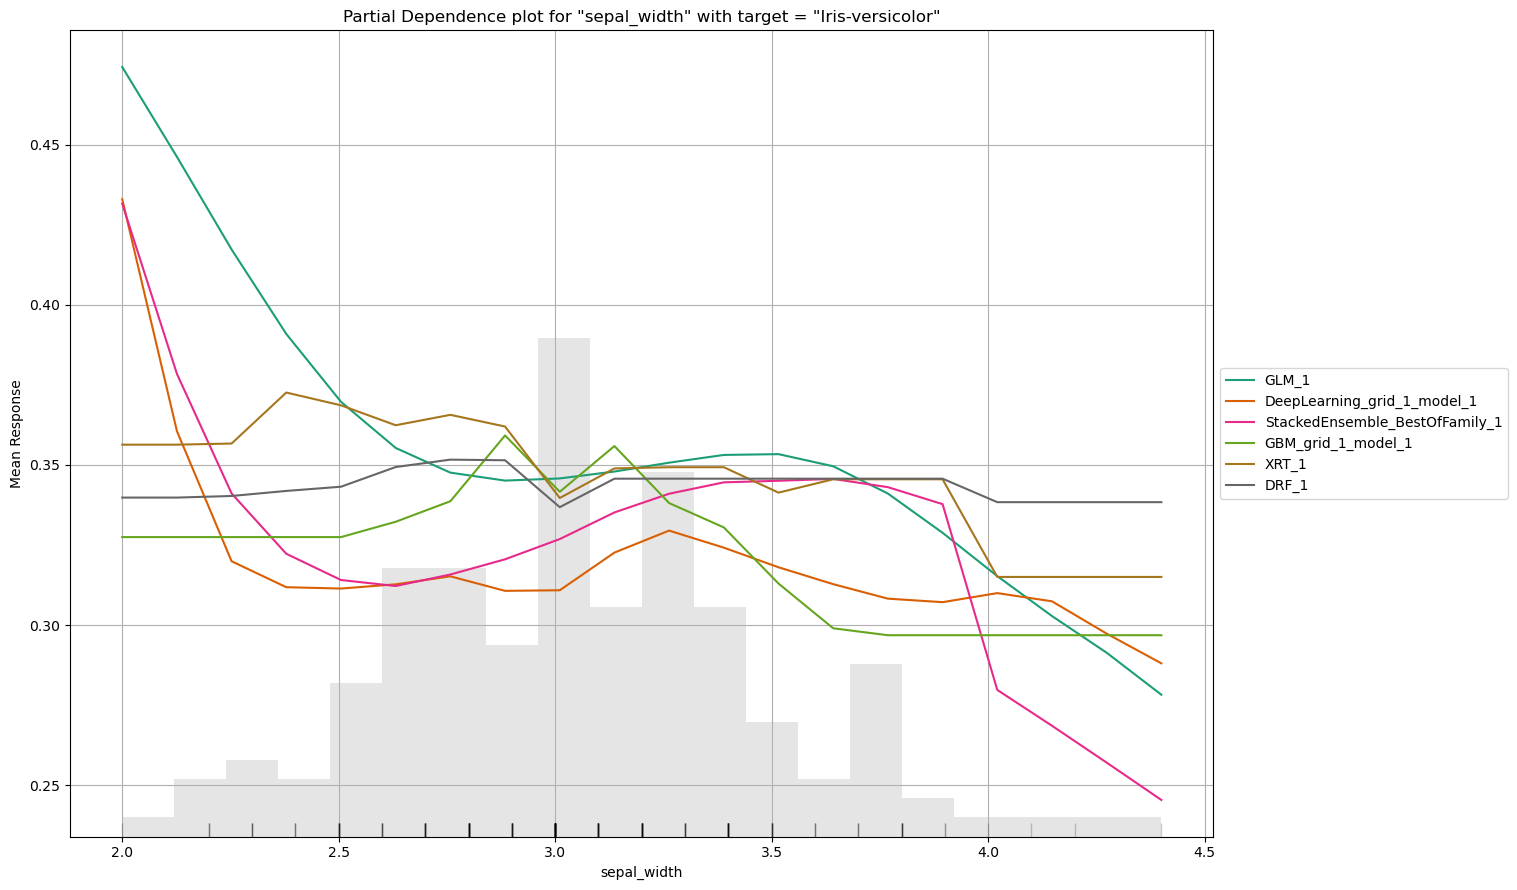

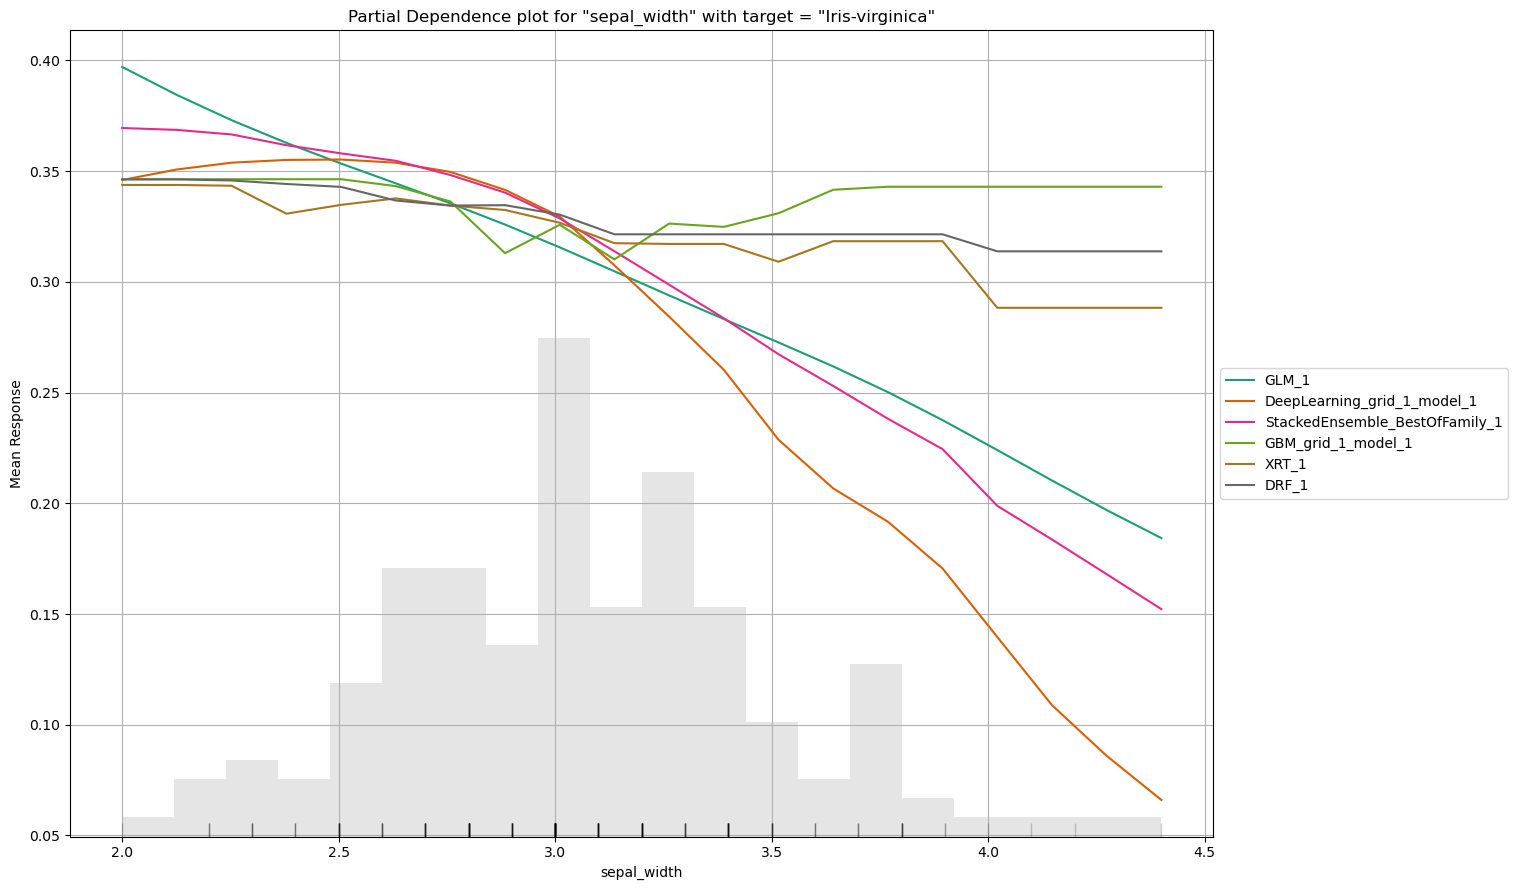

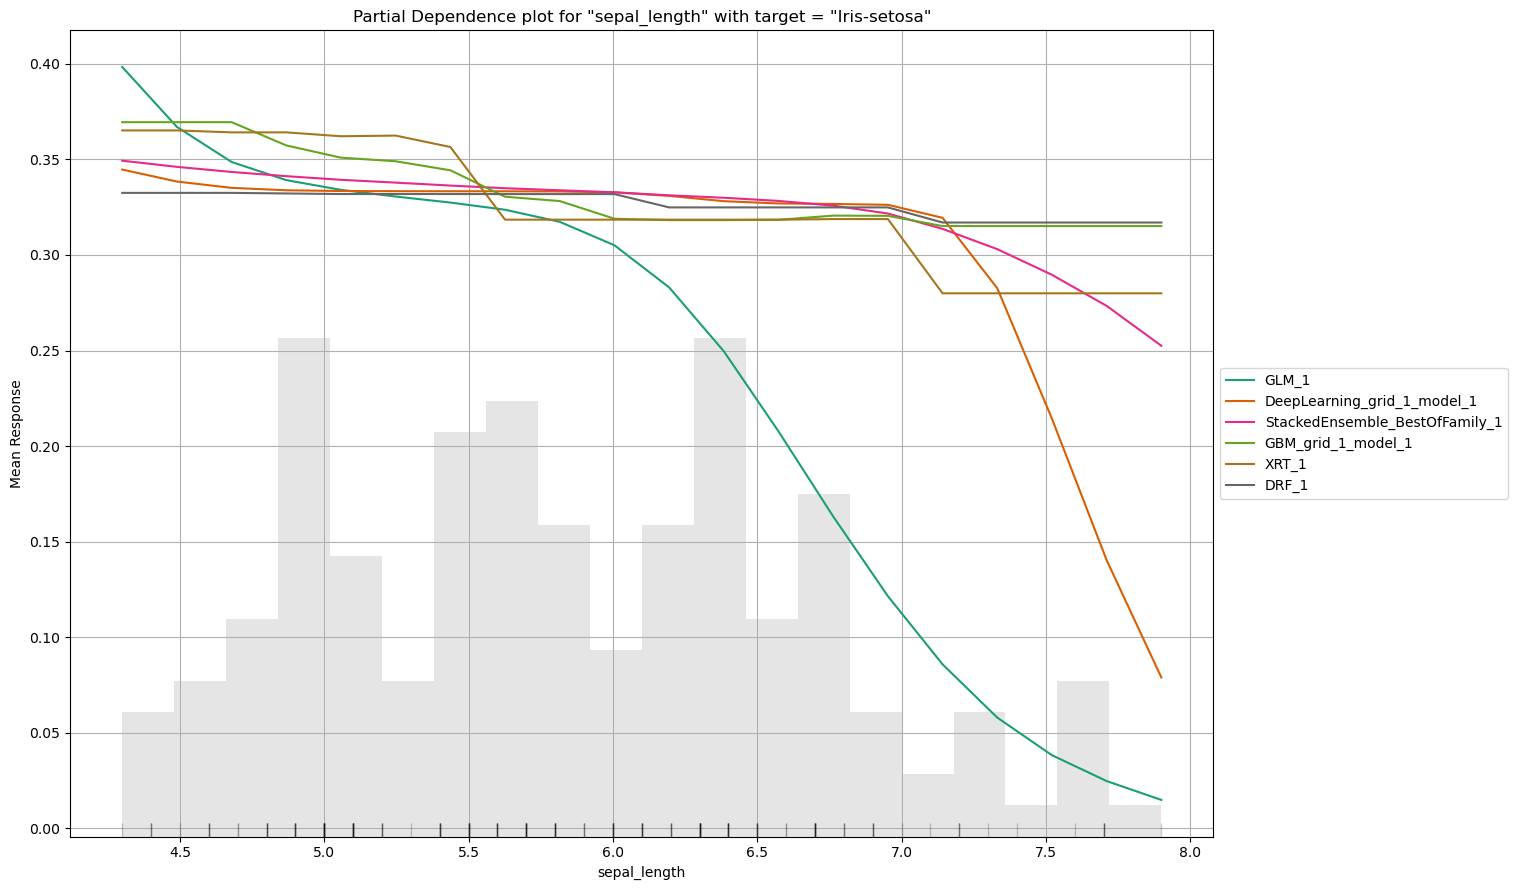

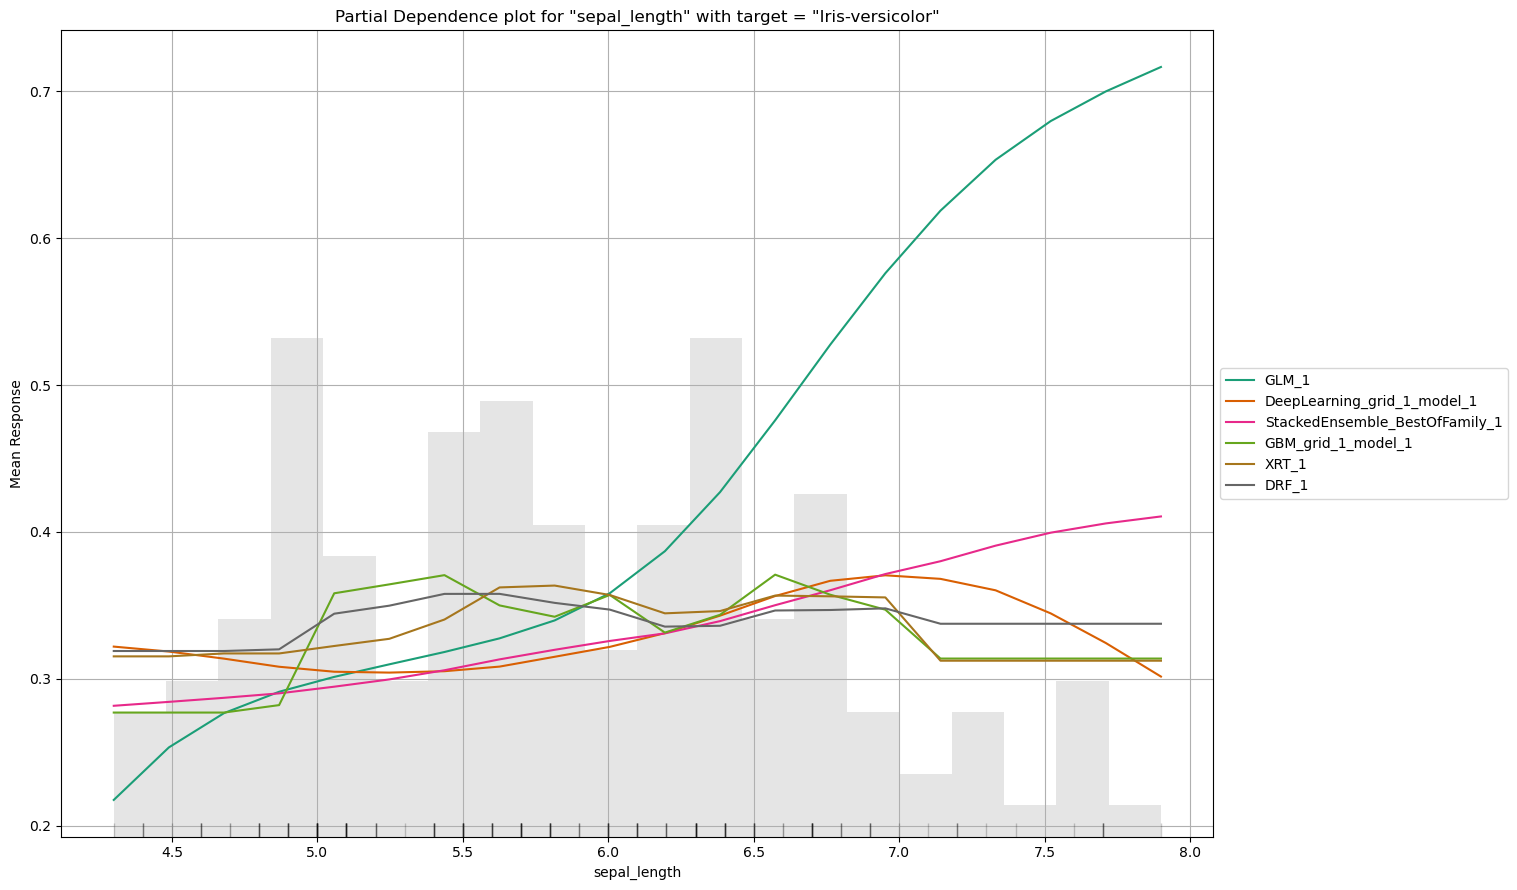

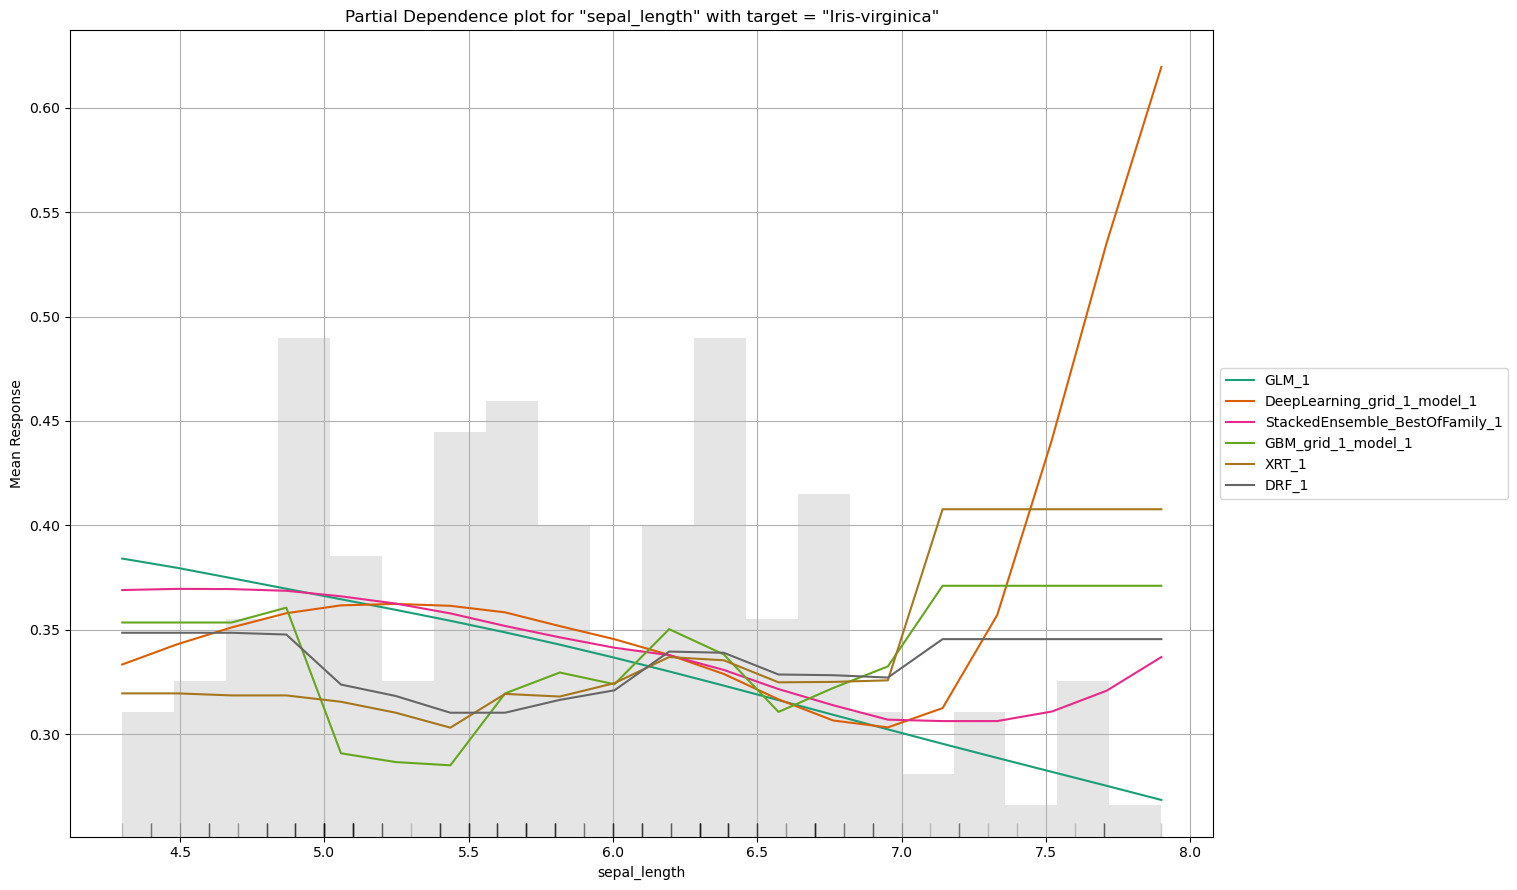

In [8]:
# the tip at the end of the training output says I can try `model.explain()` 
h2o.explain(aml, frame=h2o_data)

- I guess that's all pretty nice.